In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
application_data = pd.read_csv("application_data.csv")

In [4]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
application_data.shape

(307511, 122)

In [7]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Handling The Missing Values

In [9]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
null_counts = pd.DataFrame({'column_name': application_data.columns, 'null_count': application_data.isnull().sum()})
null_counts

,column_name,null_count
SK_ID_CURR,SK_ID_CURR,0
TARGET,TARGET,0
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0
CODE_GENDER,CODE_GENDER,0
FLAG_OWN_CAR,FLAG_OWN_CAR,0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,41519


In [11]:
null_counts.to_csv('null_counts.csv', index=False)

In [12]:
application_data['AMT_ANNUITY'] = application_data['AMT_ANNUITY'].fillna(application_data['AMT_CREDIT'] * 0.05)

<AxesSubplot:>

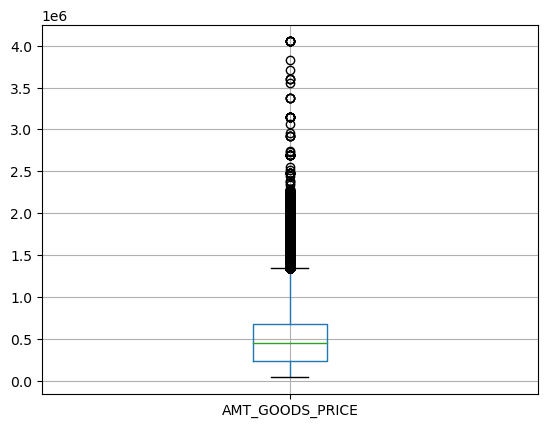

In [13]:
application_data.boxplot(column =['AMT_GOODS_PRICE']) 

As we see the are many outliers or the is a skewness in the data having large standard deviation so we are using Linear regression to fill the missing values of  'AMT_GOODS_PRICE'

In [14]:
from sklearn.linear_model import LinearRegression
train = application_data[application_data['AMT_GOODS_PRICE'].notnull()]
test = application_data[application_data['AMT_GOODS_PRICE'].isnull()]

In [15]:
X_train = train[['AMT_ANNUITY','AMT_CREDIT']]
y_train = train['AMT_GOODS_PRICE']

In [16]:
# create a linear regression model
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# create the feature matrix X for the test data
X_test = test[['AMT_ANNUITY','AMT_CREDIT']]

# use the trained model to predict the missing AMT_GOODS_PRICE values
y_test = model.predict(X_test)

In [18]:
# fill the missing AMT_GOODS_PRICE values in the original DataFrame with the predicted values
application_data.loc[application_data['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = y_test

In [19]:
# fill null values in the NAME_TYPE_SUITE, OCCUPATION_TYPE column with its mode
application_data[['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']] = application_data[['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']].fillna(application_data[['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']].mode().iloc[0])

In [20]:
application_data['OWN_CAR_AGE'] = application_data['OWN_CAR_AGE'].fillna(0)

In [21]:
# fill the missing CNT_FAM_MEMBERS,'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3' values with the mean value
application_data[['CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']] = application_data[['CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].fillna(application_data[['CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean())


In [22]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (application_data.columns[(round(100*(application_data.isnull().sum()/len(application_data.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMER

In [23]:
# Delete the columns having more than 30% missing values
application_data = application_data.drop(cols_30_percent_missing_values,axis=1)

In [24]:
application_data.shape

(307511, 75)

In [25]:
irrelevant_col = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
irrelevant_col

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [26]:
application_data = application_data.drop(irrelevant_col,axis=1)

In [27]:
application_data.shape

(307511, 56)

In [28]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                        0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
ORGANIZATION_TYPE                  0
E

In [29]:
# as AMT_REQ_CREDIT_BUREAU_QRT has max information let us handle missing value of that column and drop other AMT_Req_Credit columns
# Let us take the value of missing AMT_REQ_CREDIT_BUREAU_QRT to be mode
application_data['AMT_REQ_CREDIT_BUREAU_QRT'] = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode().iloc[0])
application_data = application_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 
       'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [30]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
ORGANIZATION_TYPE              0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
FLAG_DOCUM

In [31]:
application_data.shape

(307511, 51)

#### Converting the Days_birth into years i.e., Age of client 

In [32]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
application_data['AGE'] = abs(application_data['DAYS_BIRTH']/365)

In [33]:
application_data['AGE'] = application_data['AGE'].round().astype(int)
application_data['AGE']

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: AGE, Length: 307511, dtype: int32

##### Converting the DAYS_EMPLOYED into years of employement

In [34]:
# Divide 'DAYS_EMPLOYED ' by 365 for taking Age
application_data['Years_Employed'] = abs(application_data['DAYS_EMPLOYED']/365)

In [35]:
application_data['Years_Employed'] = application_data['Years_Employed'].round().astype(int)
application_data['Years_Employed']

0            2
1            3
2            1
3            8
4            8
          ... 
307506       1
307507    1001
307508      22
307509      13
307510       3
Name: Years_Employed, Length: 307511, dtype: int32

#####  Outlier Analysis

In [36]:
col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','Years_Employed','CNT_FAM_MEMBERS']
for i in col:
    z_score = (application_data[i] - application_data[i].mean())/application_data[i].std()
    outliers = np.abs(z_score) > 3
    application_data = application_data[~outliers]
    
application_data.shape
    

(294063, 53)

In [37]:
# to know the percentage of row got deleted
((307510-len(application_data))/307510)*100

4.372865923059413

So after the outlier analysis 4.37% of rows got deleted now we have the data set where there are no missing values and the outliers.

#####  Data Imbalance Analysis

Data imbalance is a situation where the number of observations or samples in one class or category is significantly larger or smaller than the number of observations or samples in other classes or categories. This can be a problem in machine learning models because the model may become biased towards the majority class, leading to poor performance on the minority class.

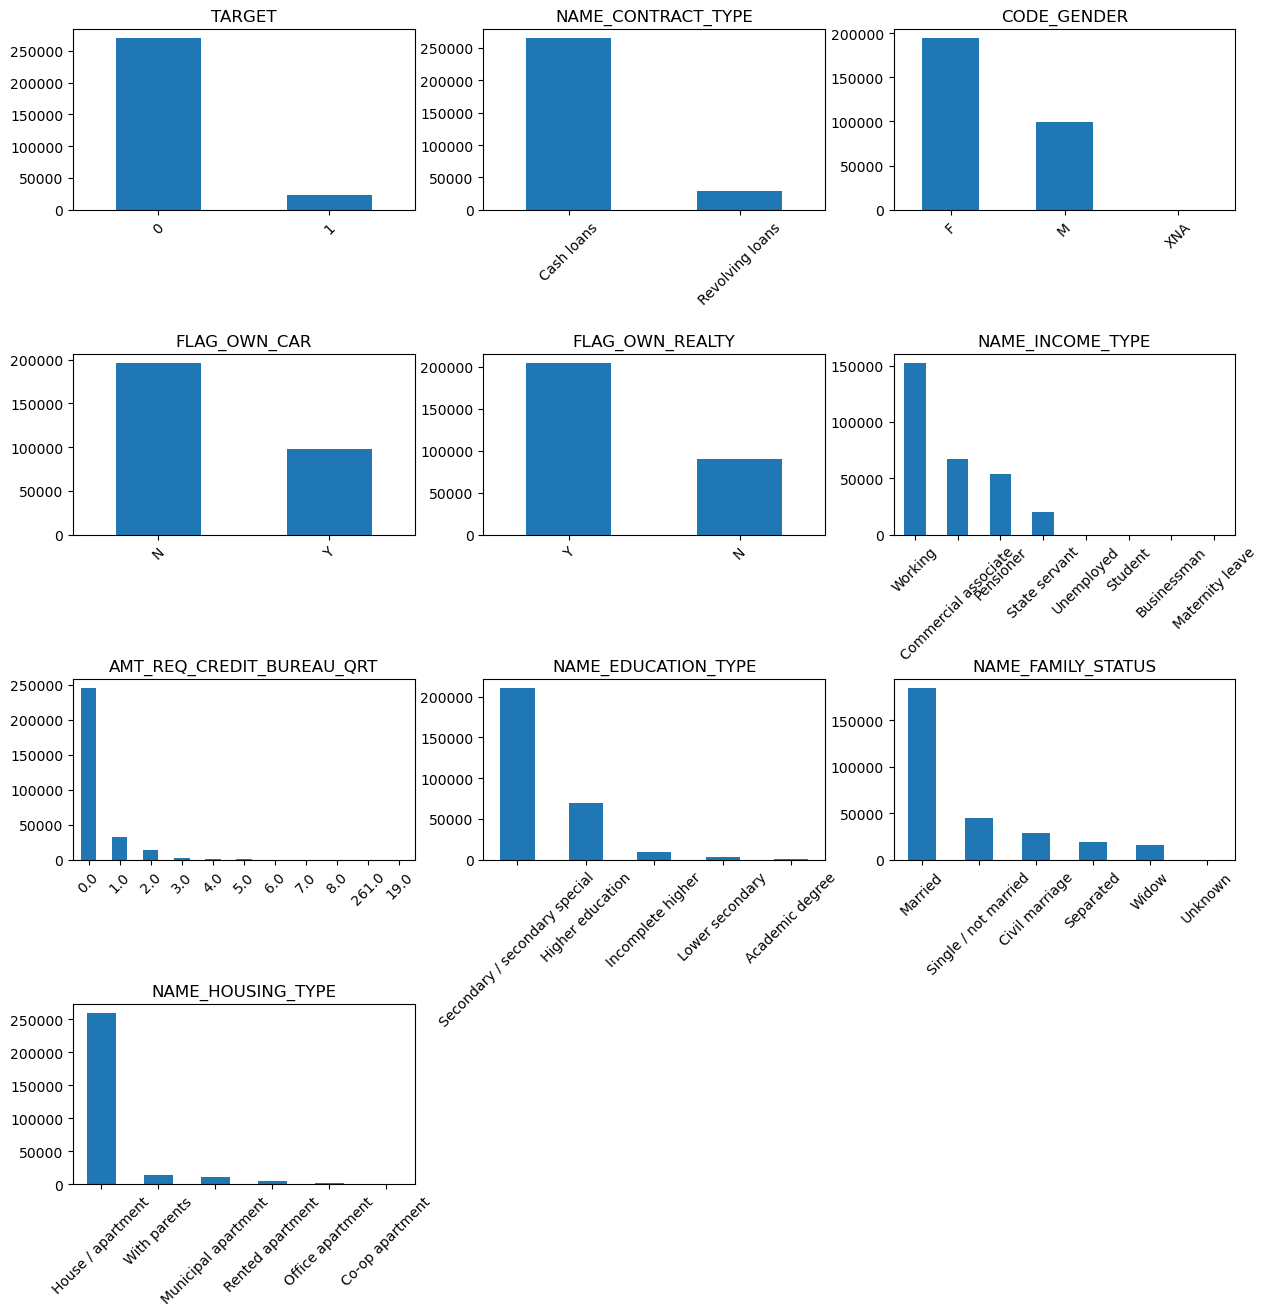

In [38]:
import matplotlib.pyplot as plt

# Let us select the catogorical columns from the dataset
cat_col = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(15,15))
for col in cat_col:    
    k=k+1
    plt.subplot(4, 3,k)
    plt.subplots_adjust(hspace=0.8)
    application_data[col].value_counts().plot(kind='bar');
    plt.xticks(rotation=45) # Set rotation here
    plt.title(col)
plt.show()

<Figure size 1500x1500 with 0 Axes>

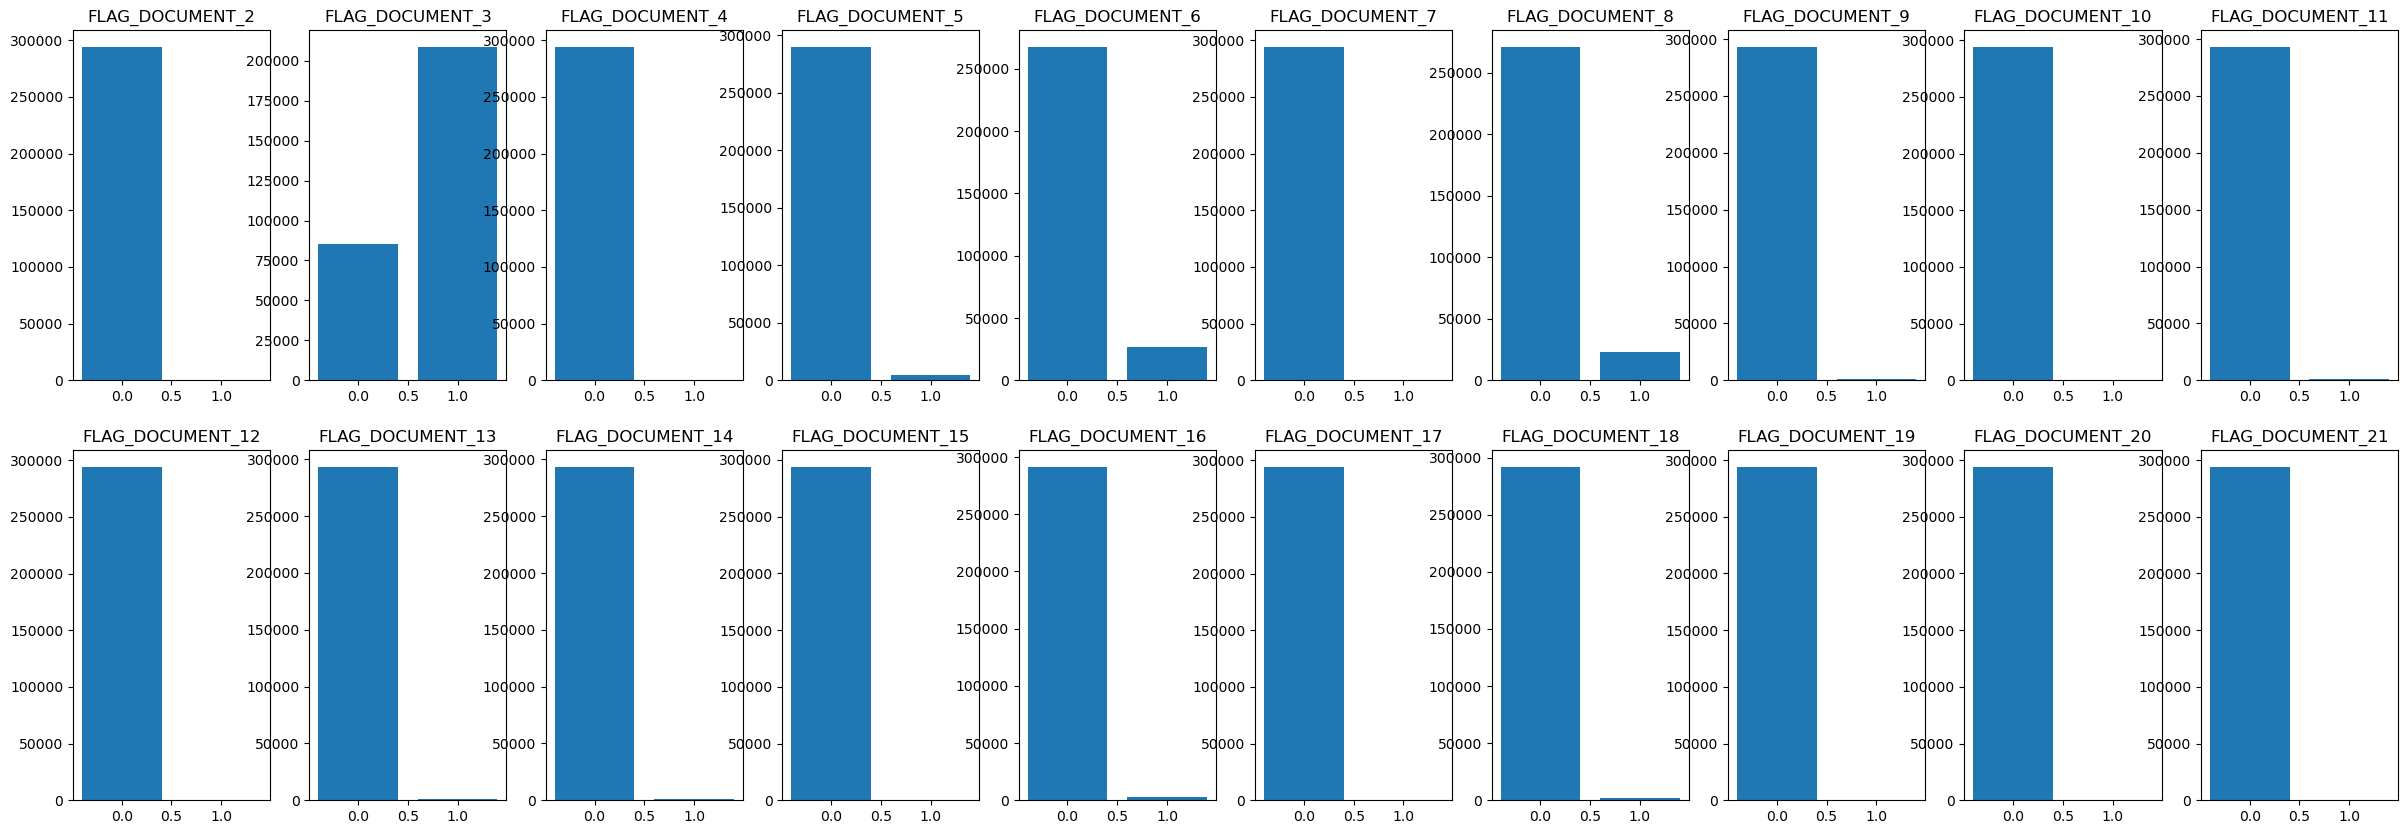

In [39]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(30, 10))
for i in range(2, 22):
    row = (i - 2) // 10  # calculate the row index
    col = (i - 2) % 10   # calculate the column index
    col_name = 'FLAG_DOCUMENT_' + str(i)
    axs[row, col].bar(application_data[col_name].value_counts().index, application_data[col_name].value_counts())
    axs[row, col].set_title(col_name)
plt.show()

As we see other than FLAG_DOCUMENT_3 all other columns mostly have 0 value so we are going to delete all the columns except for FLAG_DOCUMENT_3

In [40]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
application_data.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    application_data.drop(col,axis=1,inplace=True)

In [41]:
application_data.shape

(294063, 34)

 Binning is the process of grouping a set of numerical values into a smaller number of "bins" or "buckets.
 For example, if you have a dataset with age values ranging from 1 to 100, you could bin them into groups such as "under 18", "18-30", "31-45", "46-60", and "over 60" to make it easier to analyze the data by age group.

#####  Creating 3 Age group Young, Mid Age, Senior

In [42]:
application_data['AGE'].describe()

count    294063.000000
mean         44.007617
std          12.049632
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [43]:
def age_group(x):
    if x<40:
        return 'Young'
    elif x>=40 and x<60:
        return 'Mid Age'
    else:
        return 'Senior'
    
application_data['Age_Group'] = application_data['AGE'].apply(age_group)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,0.0,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,1,0.0,26,2,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,0.0,Core staff,2.0,1,1,0,0,School,0.311267,0.622246,0.510853,1,0.0,46,3,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,Laborers,1.0,2,2,0,0,Government,0.502130,0.555912,0.729567,0,0.0,52,1,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.502130,0.650442,0.510853,1,0.0,52,8,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,0.0,Core staff,1.0,2,2,0,0,Religion,0.502130,0.322738,0.510853,0,0.0,55,8,Mid Age


#####  Creating the 3 groups of income High, Medium , Low with AMT_INCOME_TOTAL

In [44]:
application_data['AMT_INCOME_TOTAL'].describe()

count    294063.000000
mean     162905.479011
std       83308.016640
min       25650.000000
25%      112500.000000
50%      139500.000000
75%      202500.000000
max      877500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [45]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'  
application_data['Income_Group'] = application_data['AMT_INCOME_TOTAL'].apply(income_group)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group,Income_Group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,0.0,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,1,0.0,26,2,Young,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,0.0,Core staff,2.0,1,1,0,0,School,0.311267,0.622246,0.510853,1,0.0,46,3,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,Laborers,1.0,2,2,0,0,Government,0.502130,0.555912,0.729567,0,0.0,52,1,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.502130,0.650442,0.510853,1,0.0,52,8,Mid Age,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,0.0,Core staff,1.0,2,2,0,0,Religion,0.502130,0.322738,0.510853,0,0.0,55,8,Mid Age,Medium


#####  Creating 3 groups of crdit amount similar to income High, Medium, Low for AMT_CREDIT

In [46]:
application_data['AMT_CREDIT'].describe()

count    2.940630e+05
mean     5.653596e+05
std      3.508183e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.975200e+05
75%      7.819200e+05
max      1.795203e+06
Name: AMT_CREDIT, dtype: float64

In [47]:
round(application_data['AMT_CREDIT'].describe(),2)

count     294063.00
mean      565359.64
std       350818.26
min        45000.00
25%       270000.00
50%       497520.00
75%       781920.00
max      1795203.00
Name: AMT_CREDIT, dtype: float64

In [48]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High' 
application_data['Credit_Group'] = application_data['AMT_CREDIT'].apply(credit_group)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group,Income_Group,Credit_Group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,0.0,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,1,0.0,26,2,Young,High,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,0.0,Core staff,2.0,1,1,0,0,School,0.311267,0.622246,0.510853,1,0.0,46,3,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,Laborers,1.0,2,2,0,0,Government,0.502130,0.555912,0.729567,0,0.0,52,1,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.502130,0.650442,0.510853,1,0.0,52,8,Mid Age,Medium,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,0.0,Core staff,1.0,2,2,0,0,Religion,0.502130,0.322738,0.510853,0,0.0,55,8,Mid Age,Medium,Medium


For Ease of understanding we are going to take average of the three EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 and save it in the column called as EXT_SOURCE_SCORE

In [49]:
application_data['EXT_SOURCE_SCORE'] = round((application_data['EXT_SOURCE_1']+ application_data['EXT_SOURCE_2']+ application_data['EXT_SOURCE_2'])/3,2)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group,Income_Group,Credit_Group,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,0.0,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,1,0.0,26,2,Young,High,Low,0.20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,0.0,Core staff,2.0,1,1,0,0,School,0.311267,0.622246,0.510853,1,0.0,46,3,Mid Age,High,High,0.52
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,Laborers,1.0,2,2,0,0,Government,0.502130,0.555912,0.729567,0,0.0,52,1,Mid Age,Low,Low,0.54
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.502130,0.650442,0.510853,1,0.0,52,8,Mid Age,Medium,Low,0.60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,0.0,Core staff,1.0,2,2,0,0,Religion,0.502130,0.322738,0.510853,0,0.0,55,8,Mid Age,Medium,Medium,0.38


In [50]:
application_data = application_data.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)

In [51]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group,Income_Group,Credit_Group,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,0.0,Laborers,1.0,2,2,0,0,Business Entity Type 3,1,0.0,26,2,Young,High,Low,0.20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,0.0,Core staff,2.0,1,1,0,0,School,1,0.0,46,3,Mid Age,High,High,0.52
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,Laborers,1.0,2,2,0,0,Government,0,0.0,52,1,Mid Age,Low,Low,0.54
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,1,0.0,52,8,Mid Age,Medium,Low,0.60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,0.0,Core staff,1.0,2,2,0,0,Religion,0,0.0,55,8,Mid Age,Medium,Medium,0.38


#####  Creating three External source score groups - High, Medium and Low

In [52]:
application_data['EXT_SOURCE_SCORE'].describe()

count    294063.000000
mean          0.508474
std           0.141314
min           0.010000
25%           0.420000
50%           0.540000
75%           0.610000
max           0.840000
Name: EXT_SOURCE_SCORE, dtype: float64

In [53]:
# defining a function to catogerize into three groups
def source_group(x):
    if x<0.4:
        return 'Low'
    elif x>=0.4 and x<0.6:
        return 'Medium'
    else:
        return ' High'
    
application_data['Ext_source_group'] = application_data['EXT_SOURCE_SCORE'].apply(source_group)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group,Income_Group,Credit_Group,EXT_SOURCE_SCORE,Ext_source_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,0.0,Laborers,1.0,2,2,0,0,Business Entity Type 3,1,0.0,26,2,Young,High,Low,0.20,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,0.0,Core staff,2.0,1,1,0,0,School,1,0.0,46,3,Mid Age,High,High,0.52,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,Laborers,1.0,2,2,0,0,Government,0,0.0,52,1,Mid Age,Low,Low,0.54,Medium
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,1,0.0,52,8,Mid Age,Medium,Low,0.60,High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,0.0,Core staff,1.0,2,2,0,0,Religion,0,0.0,55,8,Mid Age,Medium,Medium,0.38,Low


In [54]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
application_data = application_data[~(application_data['CODE_GENDER'] == 'XNA')]

###  Dividing the whole dataset into two parts

####  Set where target is equal to 1

In [55]:
application_target1 = application_data[application_data['TARGET'] == 1]
application_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group,Income_Group,Credit_Group,EXT_SOURCE_SCORE,Ext_source_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,0.0,Laborers,1.0,2,2,0,0,Business Entity Type 3,1,0.0,26,2,Young,High,Low,0.20,Low
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-1827,0.0,Cooking staff,1.0,3,2,0,0,Business Entity Type 3,1,2.0,51,7,Mid Age,Medium,High,0.53,Medium
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1029,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,1,0.0,48,3,Mid Age,High,High,0.37,Low
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-4409,0.0,Sales staff,2.0,3,3,0,0,Self-employed,1,0.0,37,10,Young,Medium,Low,0.61,High
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-4199,0.0,Laborers,2.0,2,2,0,0,XNA,0,0.0,68,1001,Senior,Low,Low,0.18,Low


In [56]:
application_target1.shape

(24045, 36)

In [57]:
((len(application_target1))/len(application_data))*100

8.176930479937699

The Target 1 contributes only 8.17% of the whole dataset

####  Set where target is equal to 0

In [58]:
application_target0 = application_data[application_data['TARGET'] == 0]
application_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,Years_Employed,Age_Group,Income_Group,Credit_Group,EXT_SOURCE_SCORE,Ext_source_group
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,0.0,Core staff,2.0,1,1,0,0,School,1,0.0,46,3,Mid Age,High,High,0.52,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,26.0,Laborers,1.0,2,2,0,0,Government,0,0.0,52,1,Mid Age,Low,Low,0.54,Medium
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,0.0,Laborers,2.0,2,2,0,0,Business Entity Type 3,1,0.0,52,8,Mid Age,Medium,Low,0.60,High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,0.0,Core staff,1.0,2,2,0,0,Religion,0,0.0,55,8,Mid Age,Medium,Medium,0.38,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-477,0.0,Laborers,2.0,2,2,0,0,Other,1,1.0,46,4,Mid Age,Low,Low,0.40,Medium


In [59]:
application_target0.shape

(270014, 36)

In [60]:
((len(application_target0))/len(application_data))*100

91.8230695200623

The Target 1 contributes only 8.17% of the whole dataset

# Analysis

Univariate analysis for Unordered categorical variables

##### Count of defaulters and non-defaulters on the basis of gender

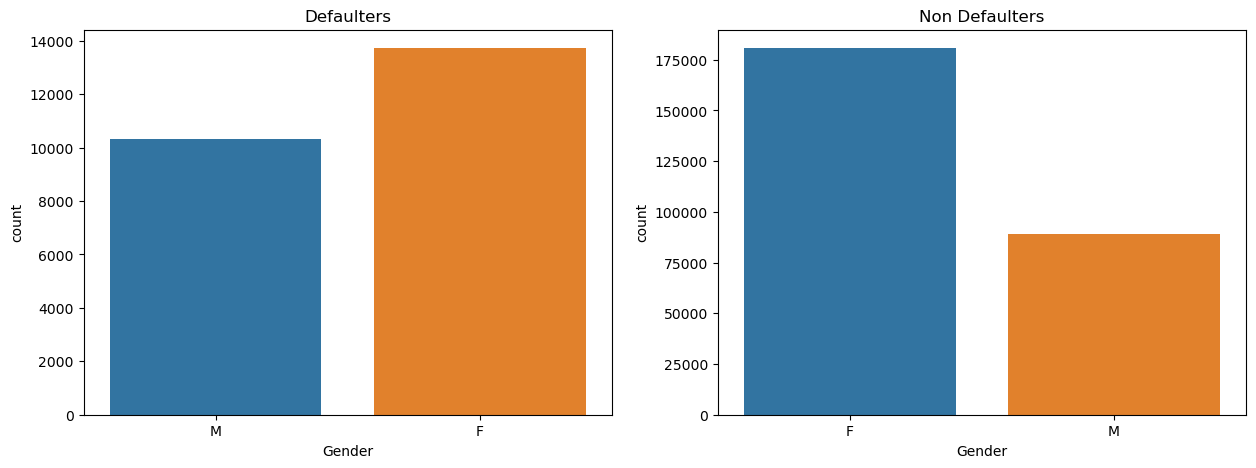

In [61]:
import seaborn as sns

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
ax = sns.countplot(x = 'CODE_GENDER', data = application_target1)
plt.title("Defaulters")
ax.set(xlabel = 'Gender')

plt.subplot(1,2,2)
ax = sns.countplot(x = 'CODE_GENDER', data = application_target0)
plt.title("Non Defaulters")
ax.set(xlabel = 'Gender')

plt.show()

#####  Count of defaulters and non-defaulters on the basis Loan Type

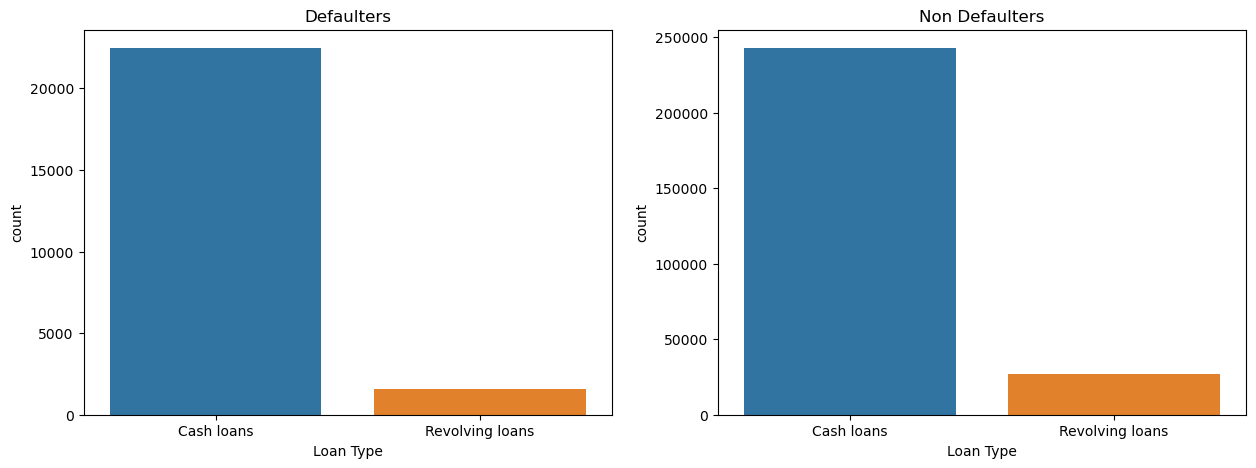

In [62]:
plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE', data = application_target1)
ax.set(xlabel = 'Loan Type')
plt.title("Defaulters")

plt.subplot(1,2,2)
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE', data = application_target0)
ax.set(xlabel = 'Loan Type')
plt.title("Non Defaulters")

plt.show()

##### Count of defaulters and non-defaulters on the basis Income Type

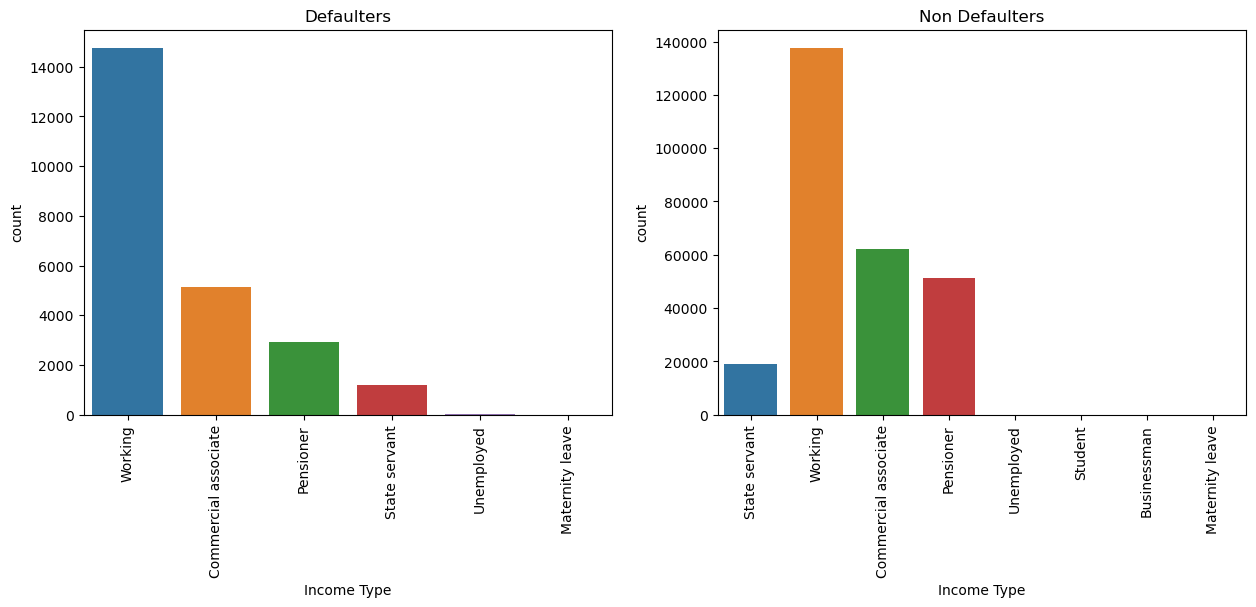

In [63]:
plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'NAME_INCOME_TYPE', data = application_target1)
ax.set(xlabel = 'Income Type')
plt.title("Defaulters")

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'NAME_INCOME_TYPE', data = application_target0)
ax.set(xlabel = 'Income Type')
plt.title("Non Defaulters")

plt.show()

##### Count of defaulters and non-defaulters on the basis Education type

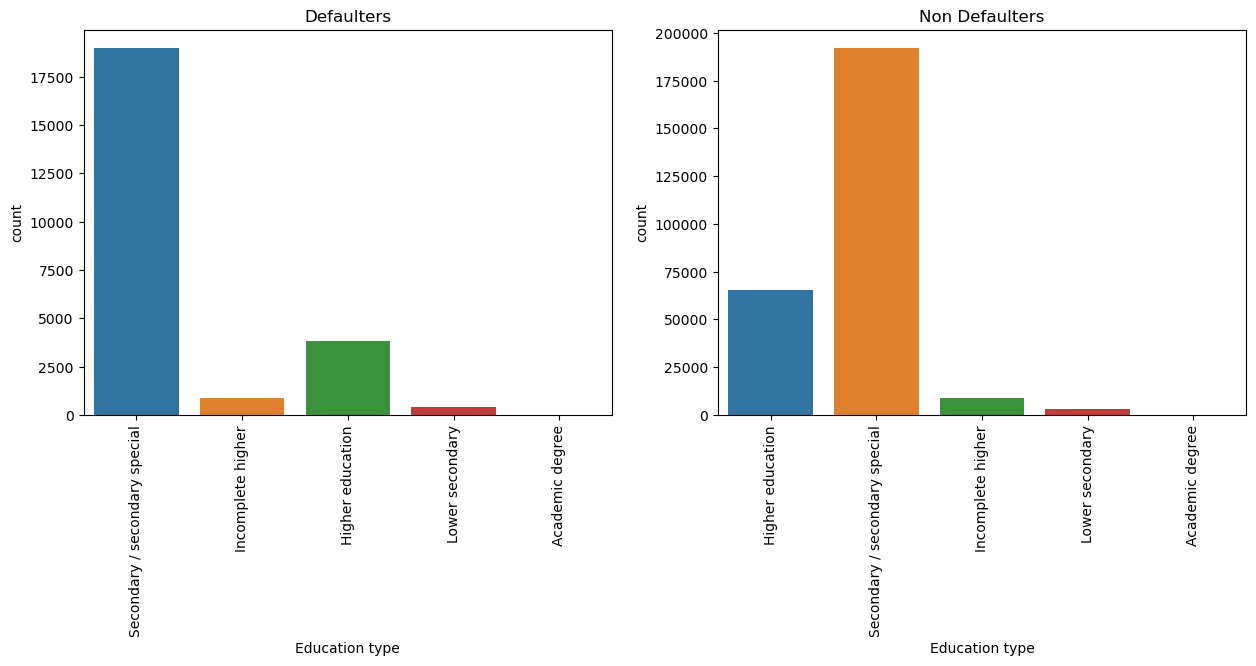

In [64]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE', data = application_target1)
ax.set(xlabel = 'Education type')
plt.title("Defaulters")

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE', data = application_target0)
ax.set(xlabel = 'Education type')
plt.title("Non Defaulters")

plt.show()

#####  Count of defaulters and non-defaulters on the basis Marital status

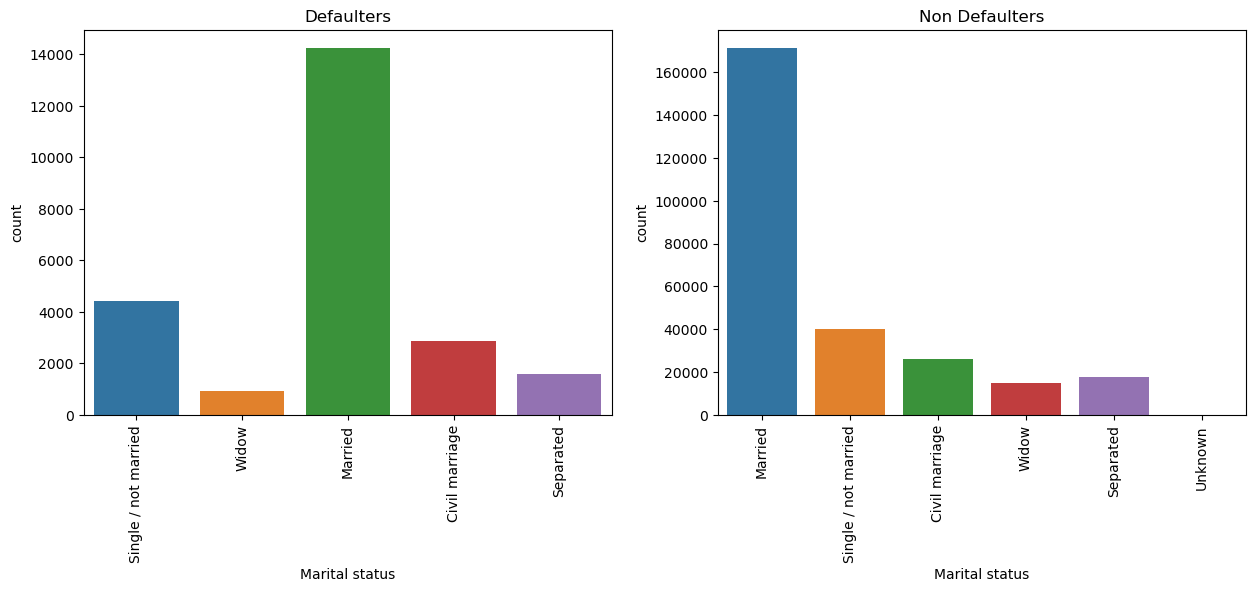

In [65]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'NAME_FAMILY_STATUS', data = application_target1)
ax.set(xlabel = 'Marital status')
plt.title("Defaulters")

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'NAME_FAMILY_STATUS', data = application_target0)
ax.set(xlabel = 'Marital status')
plt.title("Non Defaulters")

plt.show()

#####  Count of defaulters and non-defaulters on the basis OCCUPATION_TYPE

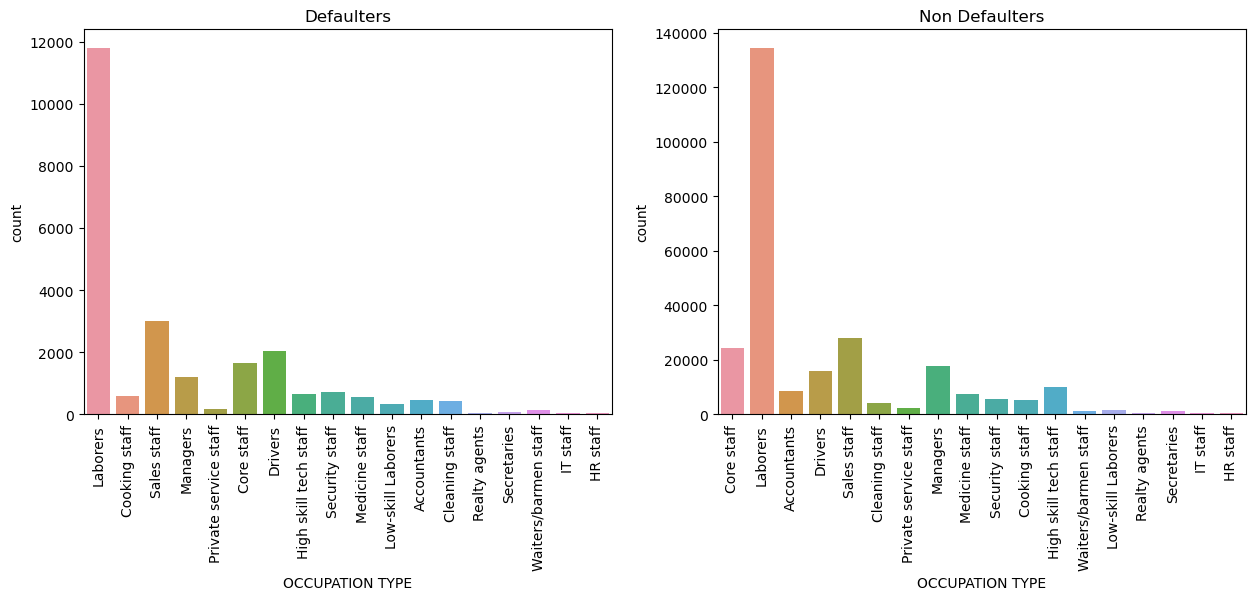

In [66]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'OCCUPATION_TYPE', data = application_target1)
ax.set(xlabel = 'OCCUPATION TYPE')
plt.title("Defaulters")

plt.subplot(1,2,2)
plt.xticks(rotation=90)
ax = sns.countplot(x = 'OCCUPATION_TYPE', data = application_target0)
ax.set(xlabel = 'OCCUPATION TYPE')
plt.title("Non Defaulters")

plt.show()

###  Univariate analysis for continious variables

##### Defaulters and non-defaulters on the basis of credit amount of the loan

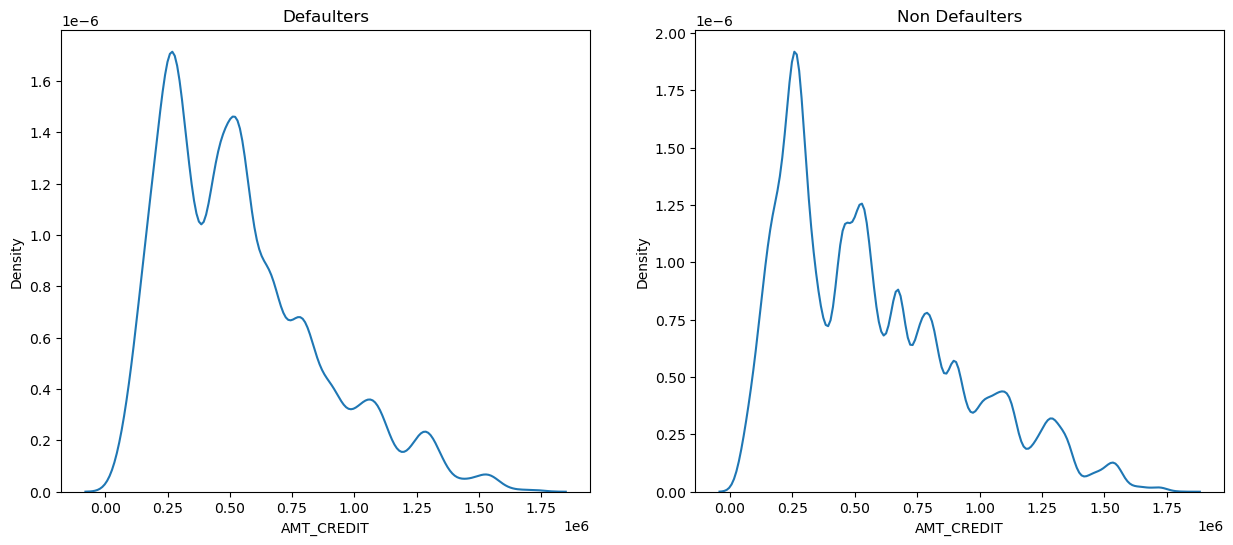

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(application_target1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(application_target0['AMT_CREDIT'],hist=False)

plt.show()

#####  Defaulters and non-defaulters on the basis of gender and their total income

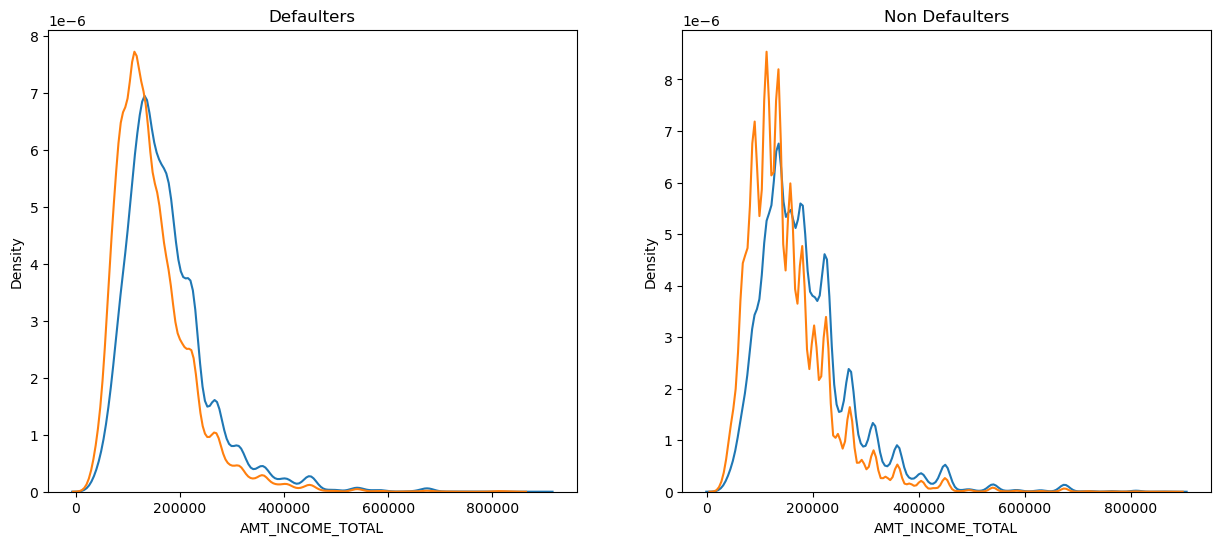

In [68]:
gender = ['M','F']
plt.figure(figsize=(15,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = application_target1[application_target1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'], hist=False, label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = application_target0[application_target0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'], hist=False, label=i)
    
plt.show()
    

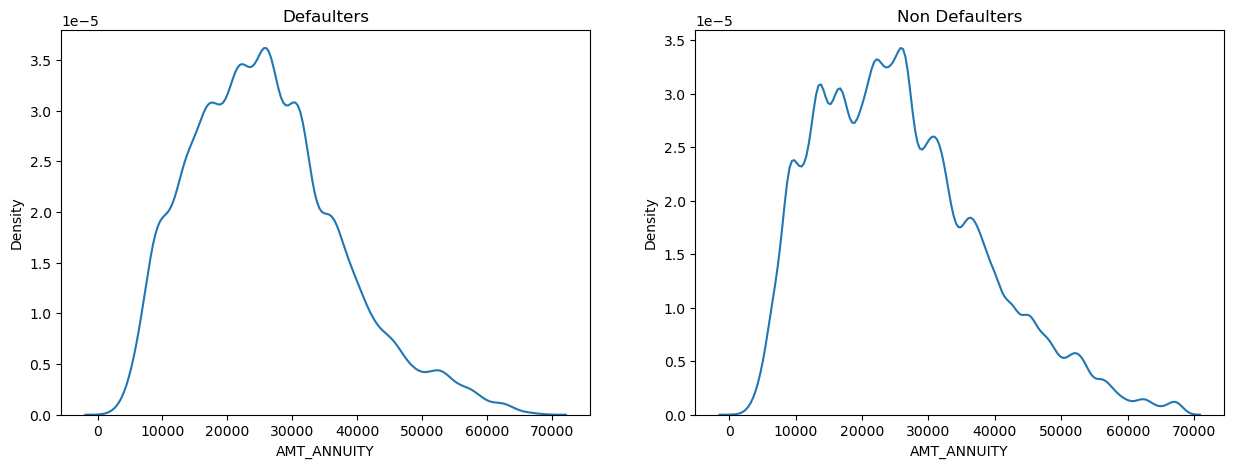

In [69]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(application_target1['AMT_ANNUITY'], hist = False)
plt.title("Defaulters")

plt.subplot(1,2,2)
sns.distplot(application_target0['AMT_ANNUITY'], hist = False)
plt.title("Non Defaulters")

plt.show()

In [70]:
application_data.to_csv('application_data_clean.csv', index=False)

### Bivariate analysis 

##### Corelation of relevant numerical columns for defaulters and non defaulters

In [71]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']

##### Corelation of defaulters

In [72]:
# Creating dataframe for numerical columns
data_corr_target_1 = application_target1[corr_cols]
data_corr_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
0,202500.0,406597.5,24700.5,351000.0,26,0.20,2
26,112500.0,979992.0,27076.5,702000.0,51,0.53,3
40,202500.0,1193580.0,35028.0,855000.0,48,0.37,2
42,135000.0,288873.0,16258.5,238500.0,37,0.61,3
81,81000.0,252000.0,14593.5,252000.0,68,0.18,2


In [73]:
# Corelation matrix
data_corr_target_1.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.314071,0.389799,0.316259,-0.002040,0.132292,-0.170425
AMT_CREDIT,0.314071,1.000000,0.743343,0.980329,0.137839,0.131618,-0.053197
AMT_ANNUITY,0.389799,0.743343,1.000000,0.742509,0.006041,0.104480,-0.064576
AMT_GOODS_PRICE,0.316259,0.980329,0.742509,1.000000,0.139022,0.142234,-0.060601
AGE,-0.002040,0.137839,0.006041,0.139022,1.000000,0.220656,-0.031540
EXT_SOURCE_SCORE,0.132292,0.131618,0.104480,0.142234,0.220656,1.000000,-0.244612
REGION_RATING_CLIENT,-0.170425,-0.053197,-0.064576,-0.060601,-0.031540,-0.244612,1.000000


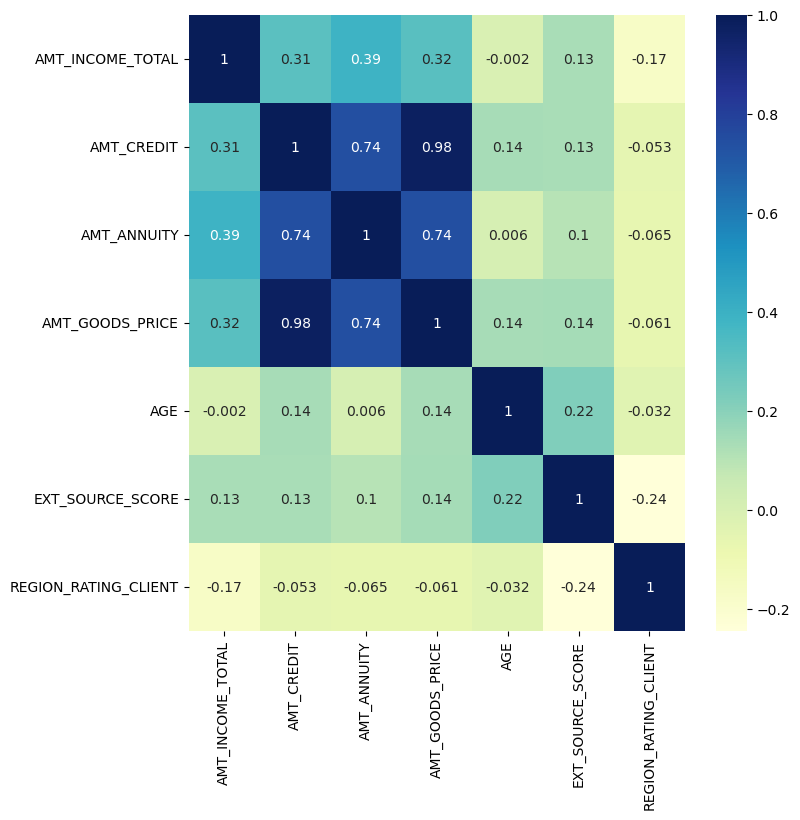

In [74]:
plt.figure(figsize=(8,8))
sns.heatmap(data_corr_target_1.corr(),cmap="YlGnBu",annot=True)
plt.show()

#####  Corelation of non defaulters

In [75]:
# Creating dataframe for numerical columns
data_corr_target_0 = application_target0[corr_cols]
data_corr_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
1,270000.0,1293502.5,35698.5,1129500.0,46,0.52,1
2,67500.0,135000.0,6750.0,135000.0,52,0.54,2
3,135000.0,312682.5,29686.5,297000.0,52,0.60,2
4,121500.0,513000.0,21865.5,513000.0,55,0.38,2
5,99000.0,490495.5,27517.5,454500.0,46,0.40,2


In [76]:
data_corr_target_0.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.350395,0.432341,0.356140,-0.083886,0.157796,-0.212530
AMT_CREDIT,0.350395,1.000000,0.770689,0.984256,0.051207,0.133135,-0.076742
AMT_ANNUITY,0.432341,0.770689,1.000000,0.772876,-0.018963,0.121970,-0.111278
AMT_GOODS_PRICE,0.356140,0.984256,0.772876,1.000000,0.049123,0.141898,-0.077810
AGE,-0.083886,0.051207,-0.018963,0.049123,1.000000,0.188416,-0.001502
EXT_SOURCE_SCORE,0.157796,0.133135,0.121970,0.141898,0.188416,1.000000,-0.281086
REGION_RATING_CLIENT,-0.212530,-0.076742,-0.111278,-0.077810,-0.001502,-0.281086,1.000000


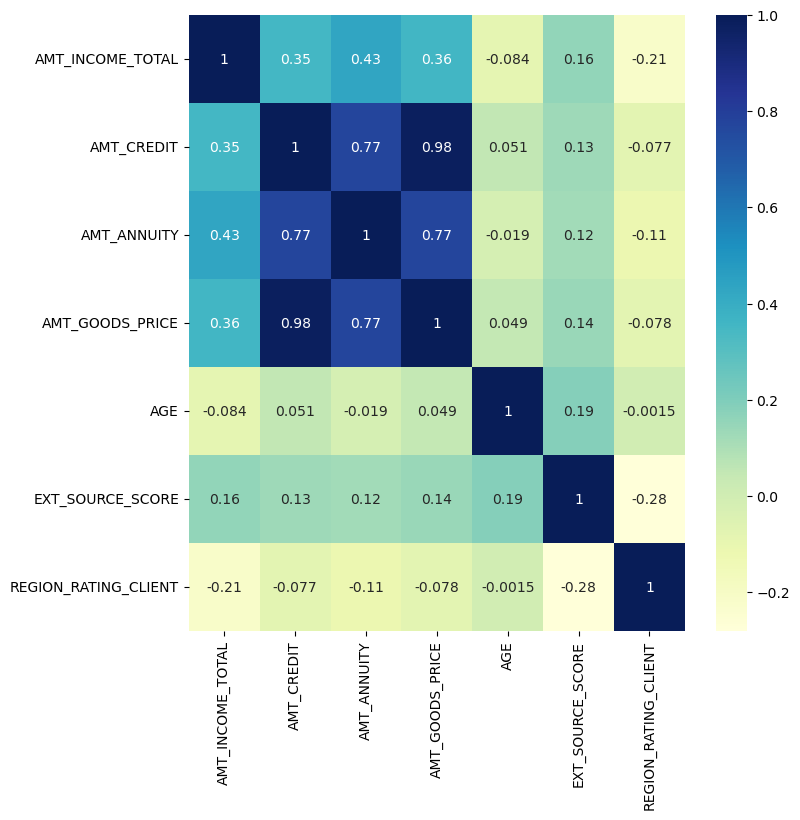

In [77]:
plt.figure(figsize=(8,8))
sns.heatmap(data_corr_target_0.corr(),cmap="YlGnBu",annot=True)
plt.show()

##### Bivariate analysis on continious variable

#####  Credit amount of the loan on the basis of client income for both male and female

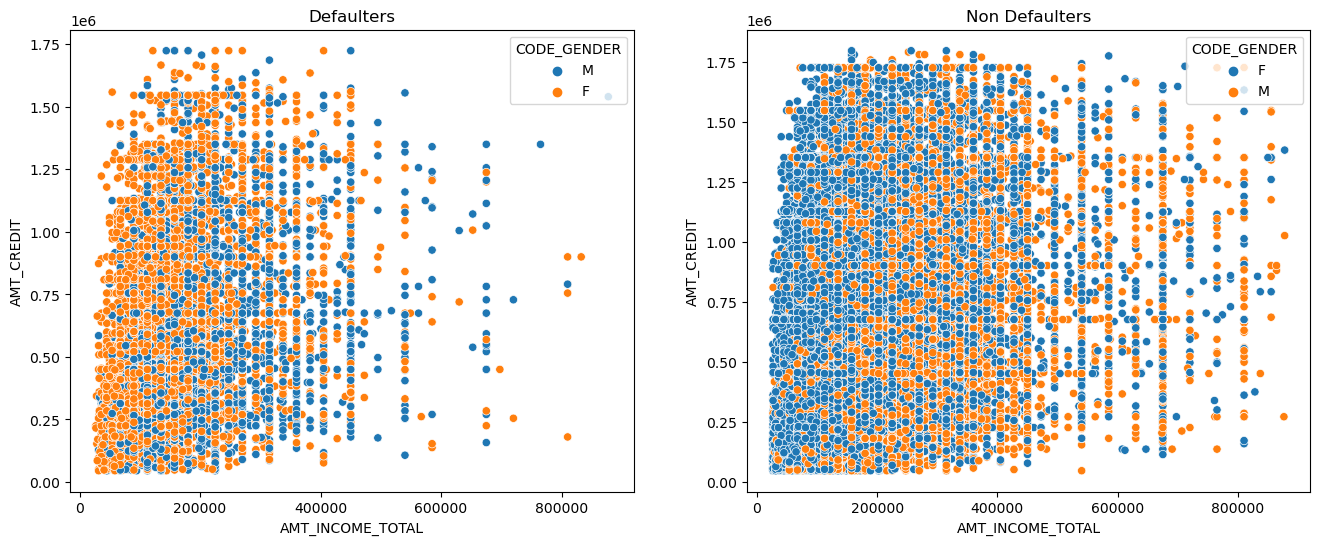

In [78]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=application_target1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=application_target0)
plt.title('Non Defaulters')
plt.show()

##### Bivariate analysis on categorical variable
Credit amount of the loan of various categories

In [79]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','Age_Group','Income_Group','Ext_source_group']

##### Defaulters

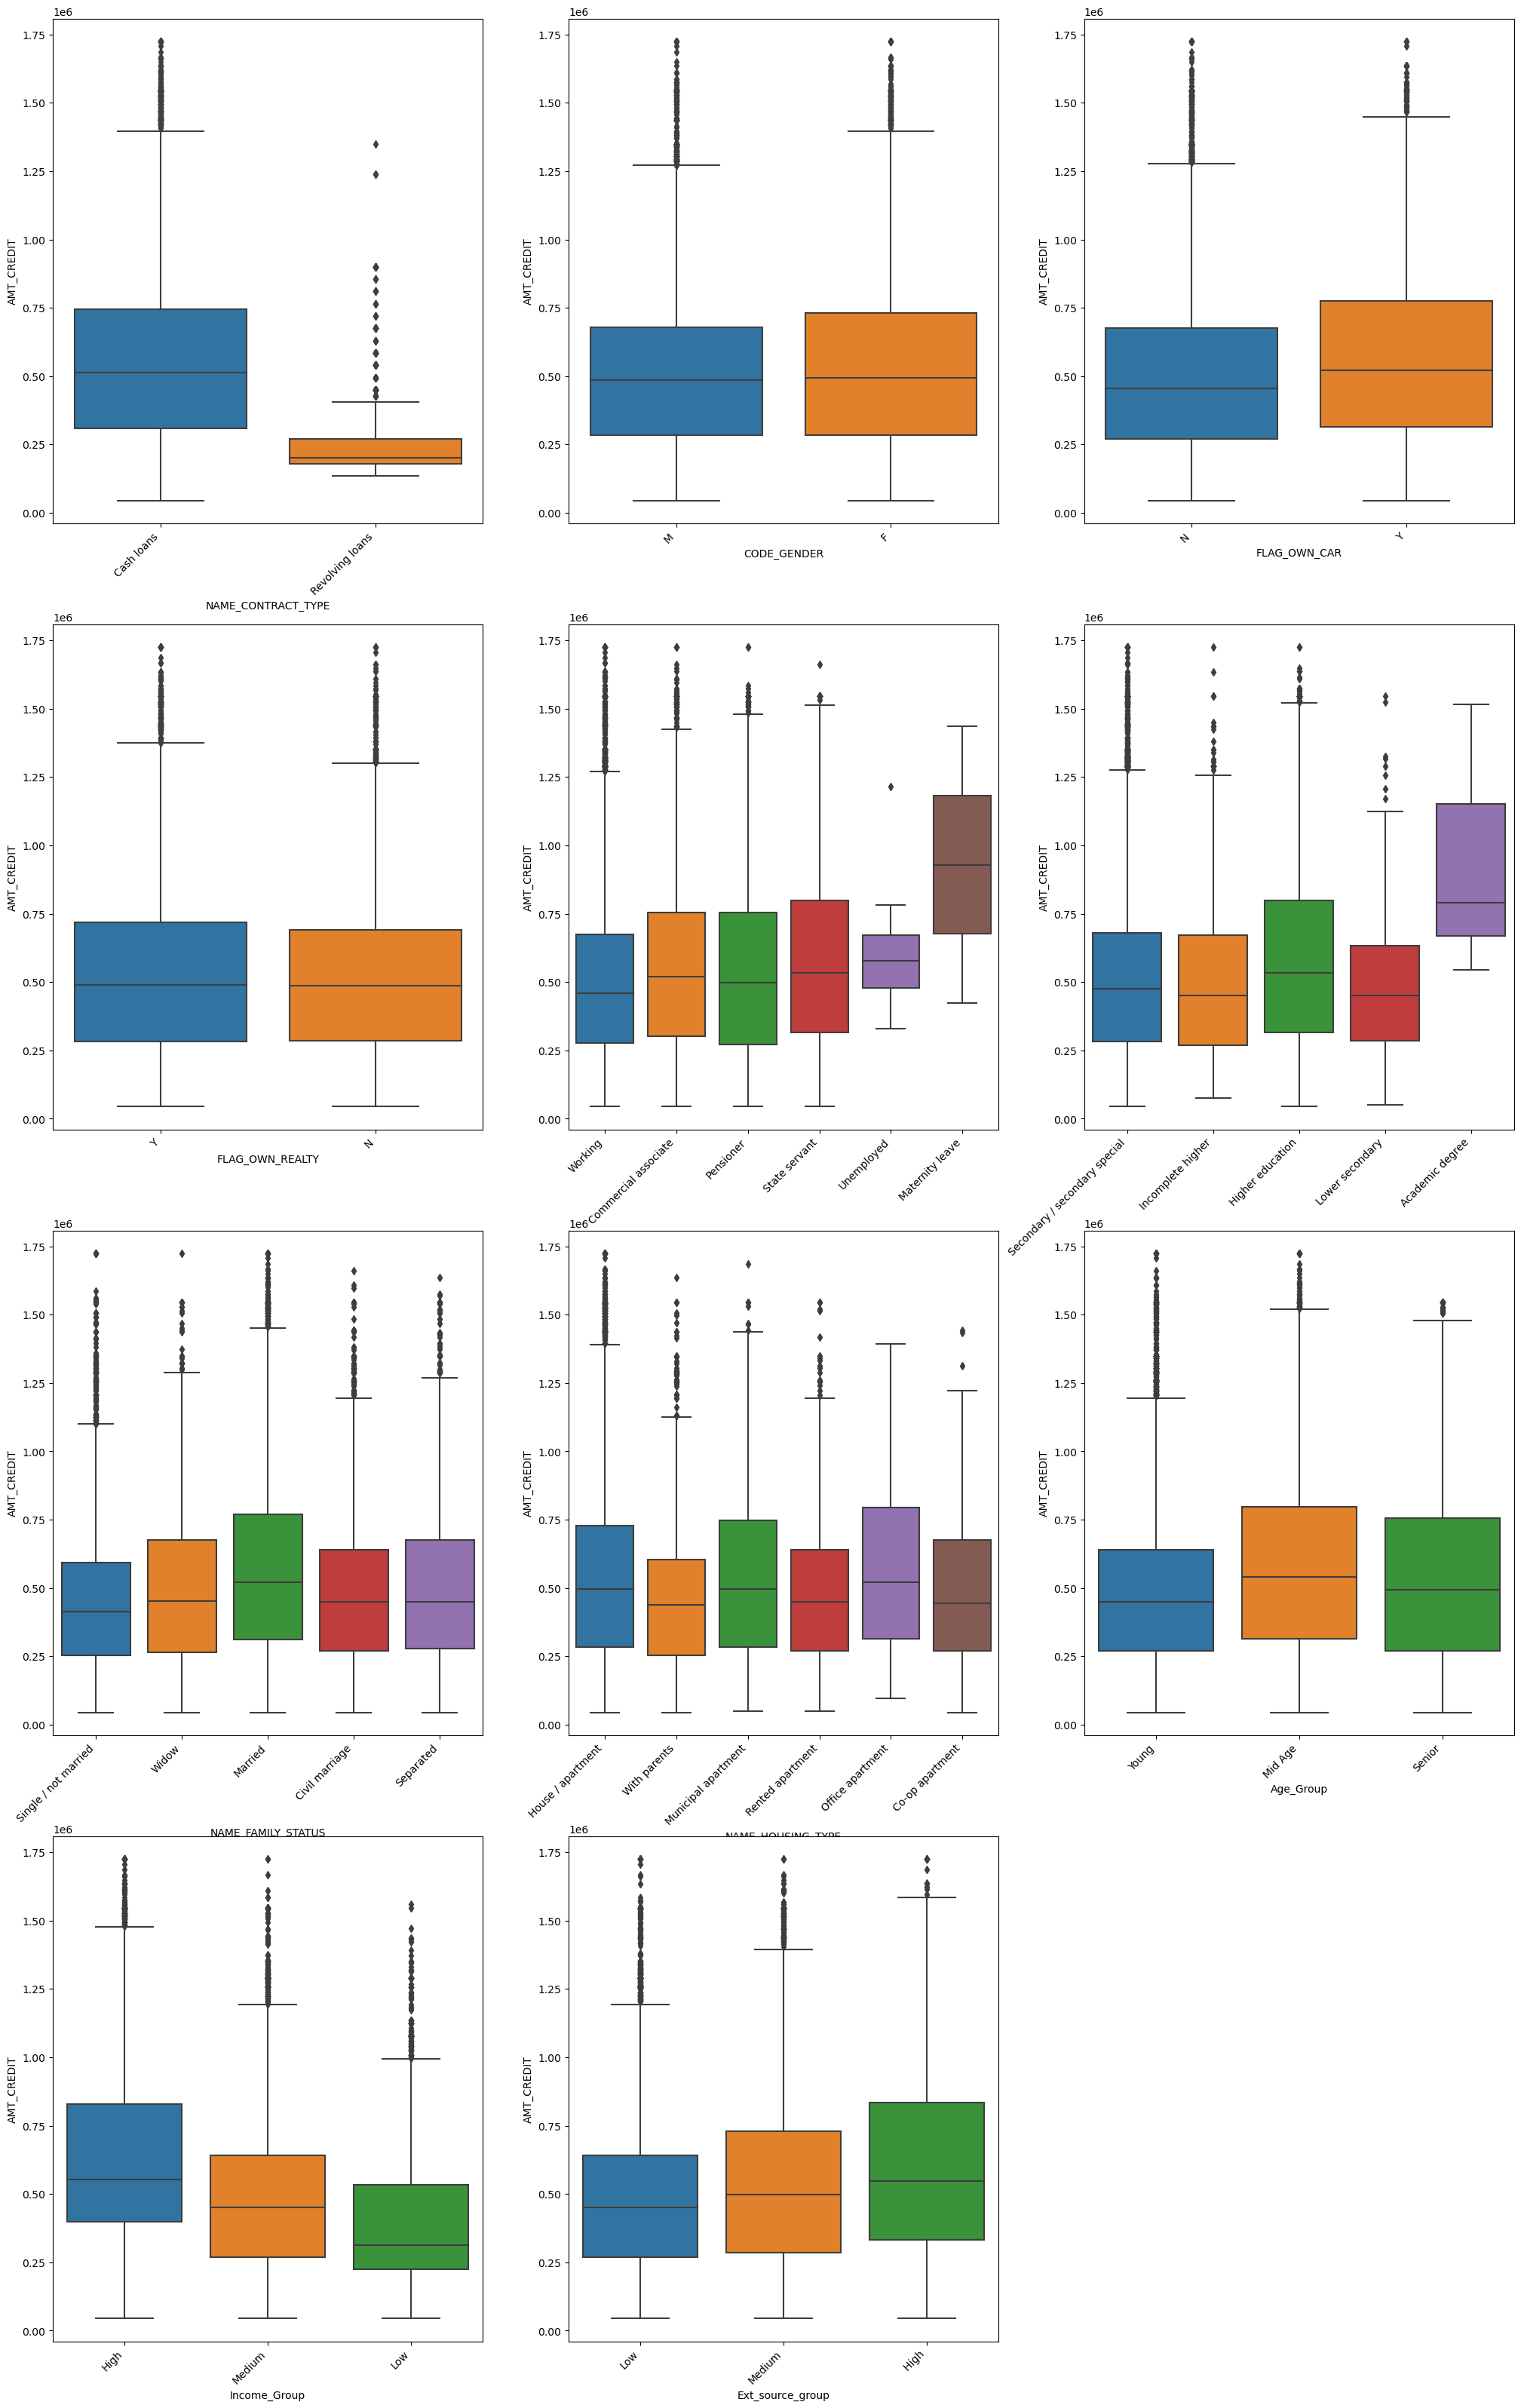

In [80]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=application_target1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plt.show()

##### Non-Defaulters

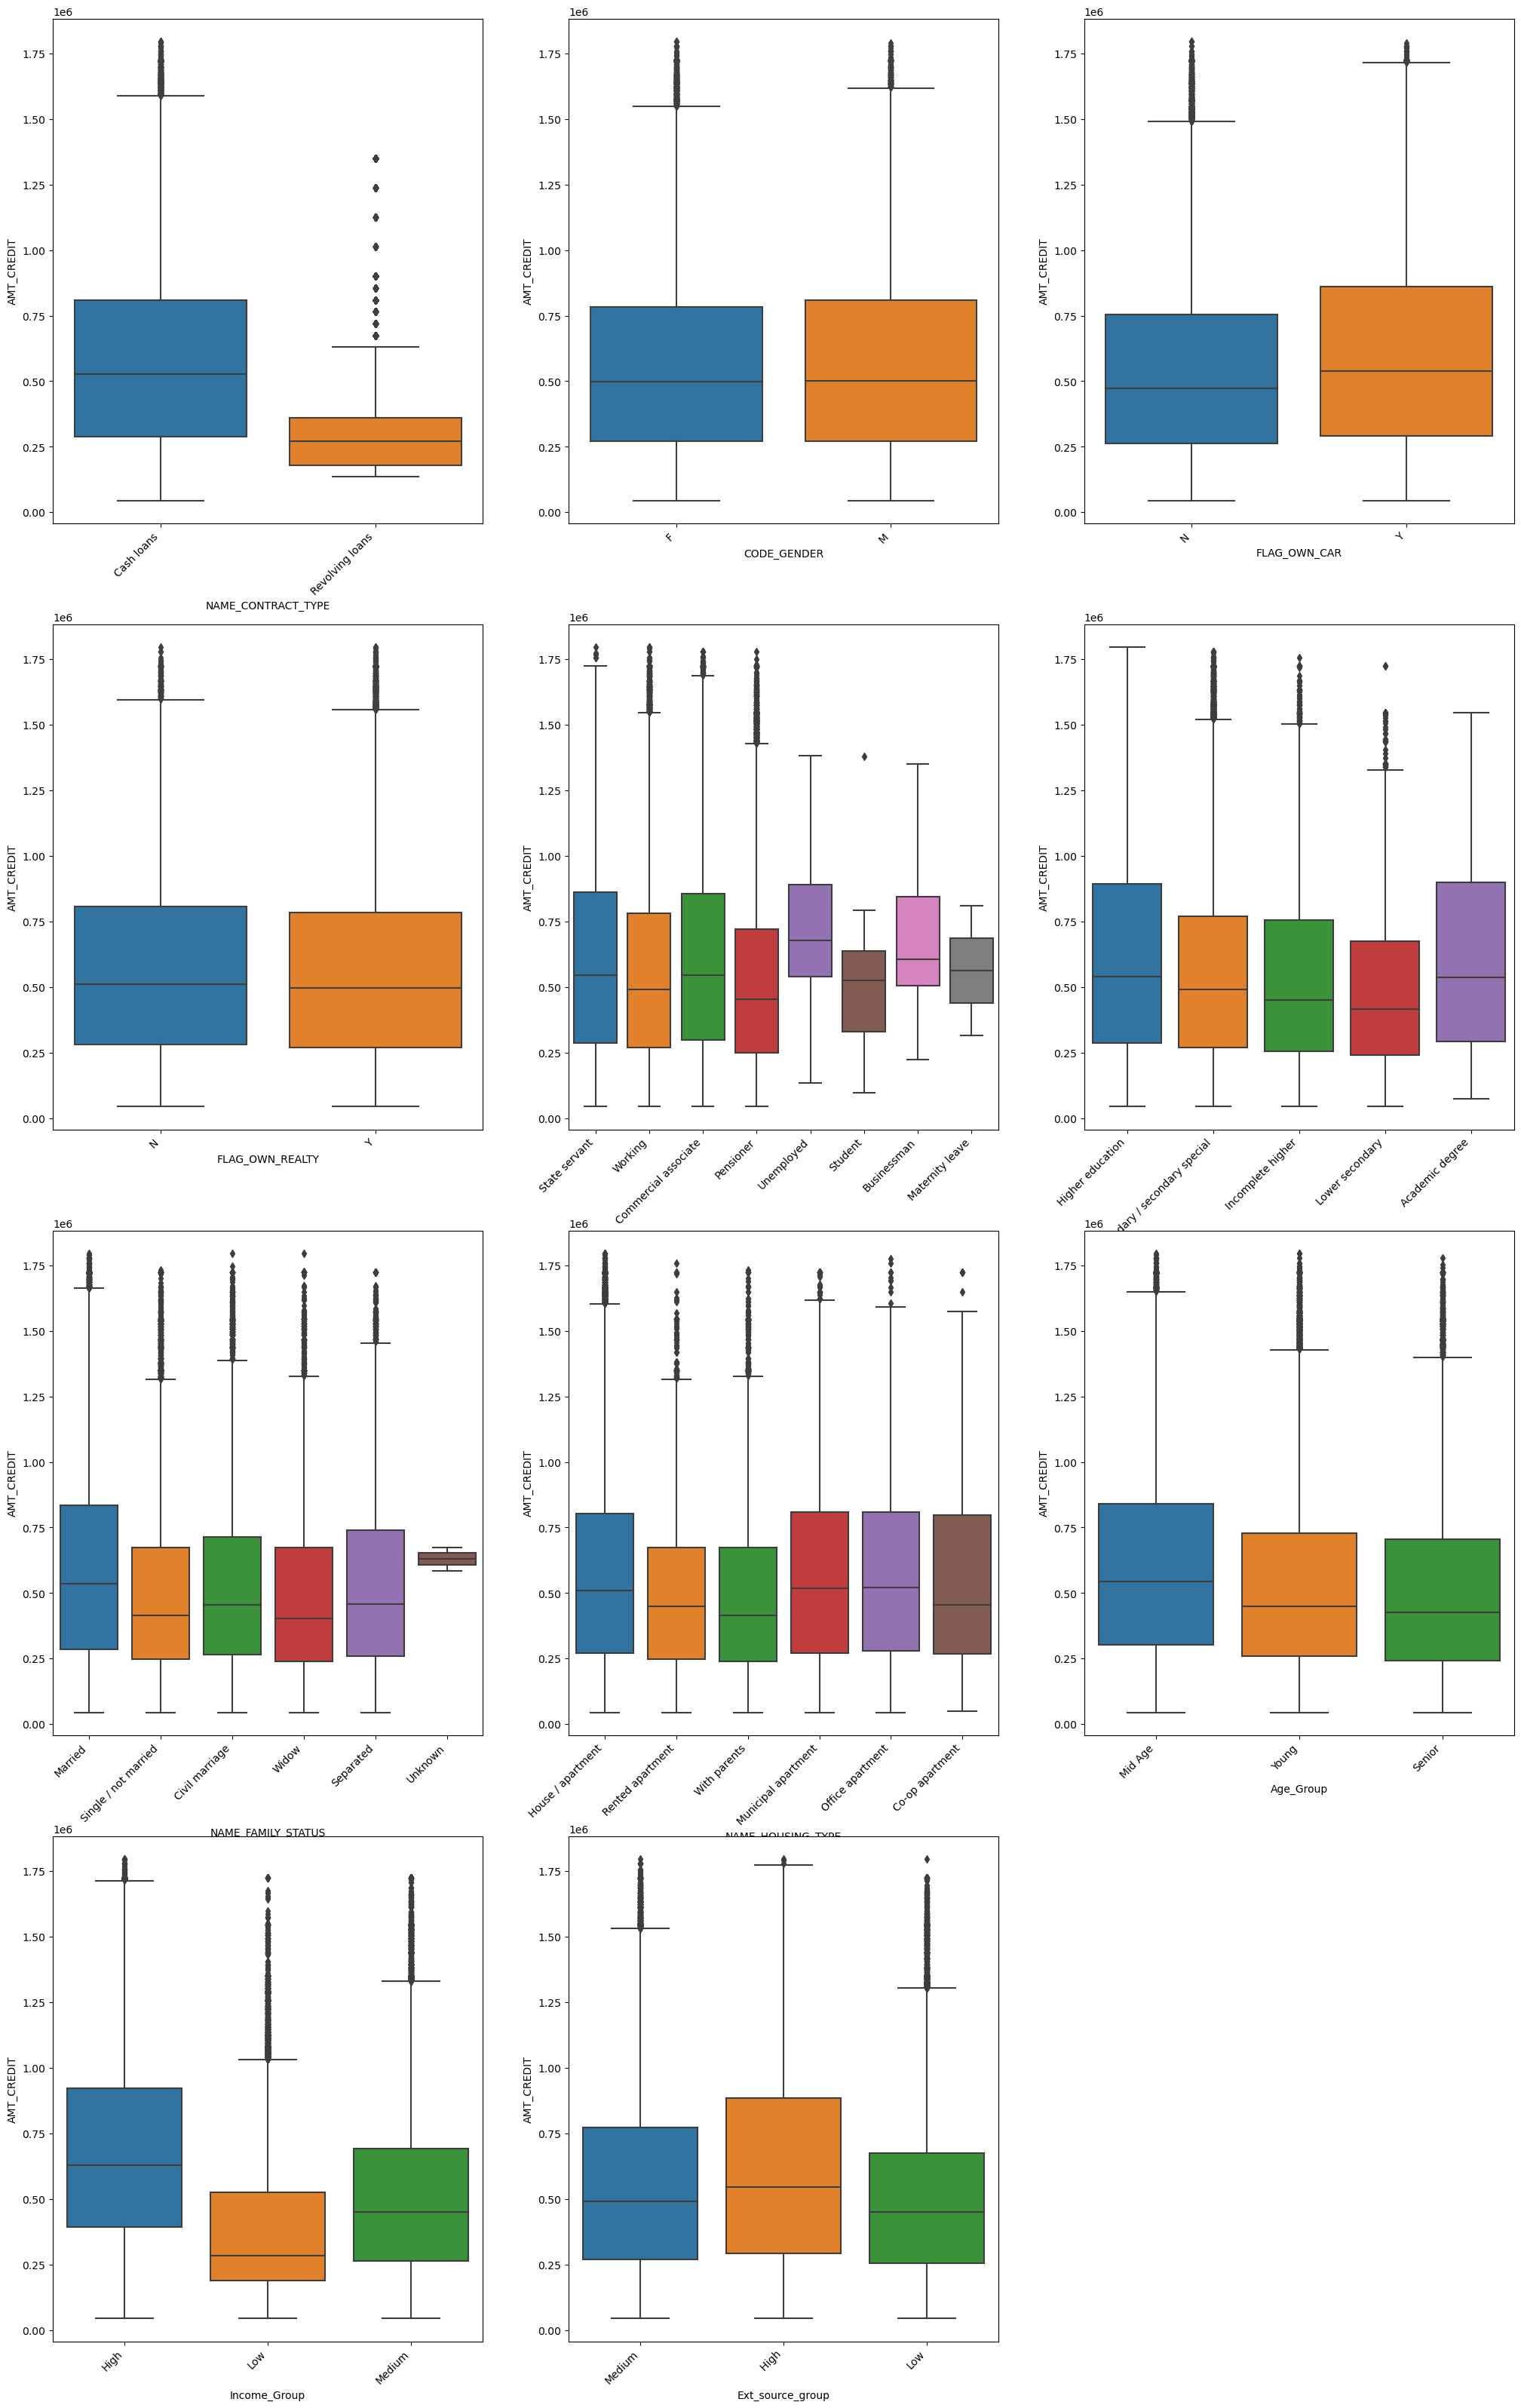

In [81]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=application_target0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plt.show()

##### Analysis of two segmented variables
Income group and gender

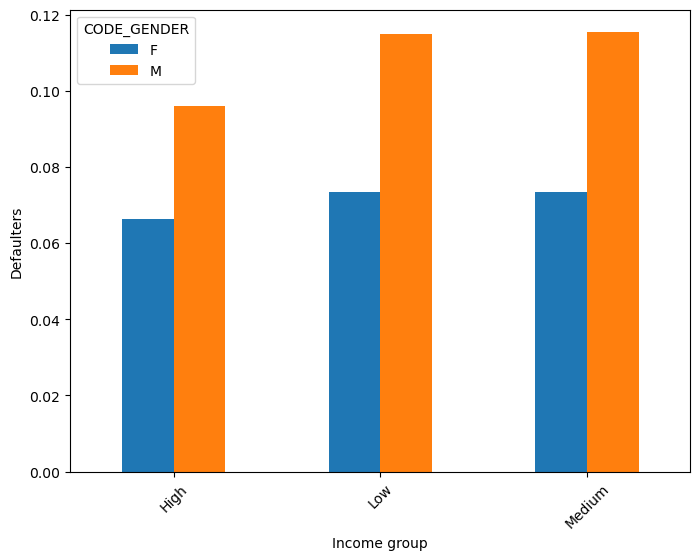

In [82]:
application_data.pivot_table(values='TARGET',index='Income_Group',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')
plt.show()

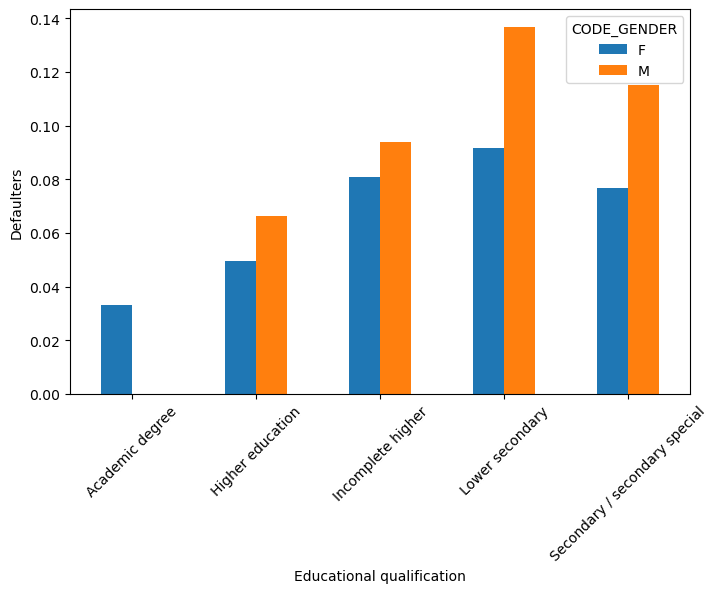

In [83]:
application_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')
plt.show()

##### Credit amount group and Income group

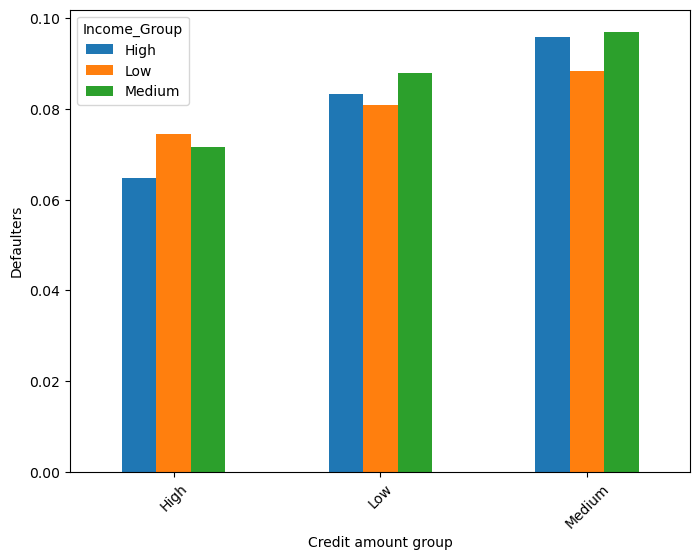

In [84]:
application_data.pivot_table(values='TARGET',index='Credit_Group',columns='Income_Group',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')
plt.show()

##### Credit amount group and Age group

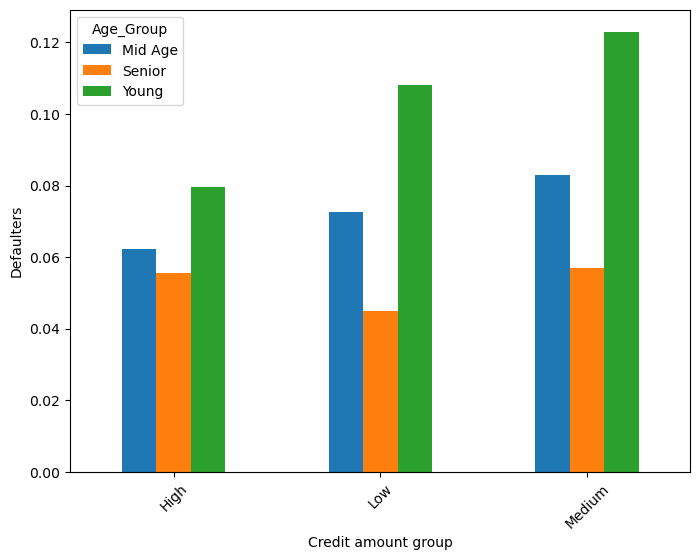

In [85]:
application_data.pivot_table(values='TARGET',index='Credit_Group',columns='Age_Group',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')
plt.show()

##### Age group and Income group

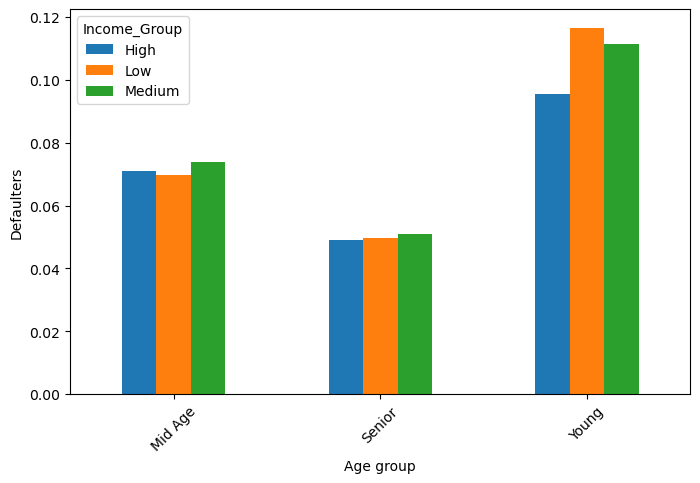

In [86]:
application_data.pivot_table(values='TARGET',index='Age_Group',columns='Income_Group',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')
plt.show()

##### Profession and Gender

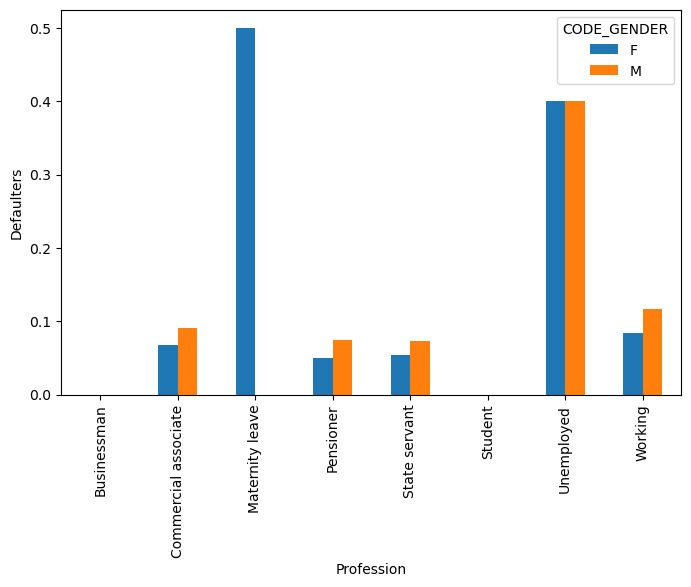

In [87]:
application_data.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')
plt.show()

## Analysis on Previous application

In [88]:
application_previous = pd.read_csv('previous_application.csv')
application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
application_previous.shape

(1670214, 37)

In [90]:
application_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [91]:
application_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


##### Handaling missing values in columns

In [92]:
application_previous.replace('XNA',np.nan,inplace=True)
application_previous.replace('XAP',np.nan,inplace=True)

In [93]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (application_previous.columns[(round(100*(application_previous.isnull().sum()/len(application_previous.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [94]:
# Delete the columns having more than 30% missing values
application_previous = application_previous.drop(cols_30_percent_missing_values,axis=1)

###### List and delete the columns, which are not much relevant for the analysis

In [95]:
application_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [96]:
application_previous.shape

(1670214, 19)

In [97]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']
# Delete the columns which are irrelevant for the analysis
application_previous = application_previous.drop(cols_irrelevant,axis=1)

In [98]:
application_previous.shape

(1670214, 15)

##### Treating Missing Values in Rows

In [99]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(application_previous[application_previous.isnull().sum(axis=1) > (len(application_previous.columns)//2)].index)

0

In [100]:
# Percent of missing values in columns
(round(100*(application_previous.isnull().sum()/len(application_previous.index)),2))

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [101]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(application_previous[np.isnan(application_previous['AMT_ANNUITY']) & np.isnan(application_previous['CNT_PAYMENT']) & np.isnan(application_previous['AMT_GOODS_PRICE'])])

333855

In [102]:
application_previous = application_previous[(~(np.isnan(application_previous['AMT_ANNUITY']) & np.isnan(application_previous['AMT_GOODS_PRICE']) & np.isnan(application_previous['CNT_PAYMENT'])))]

In [103]:
application_previous.shape

(1336359, 15)

In [104]:
(round(100*(application_previous.isnull().sum()/len(application_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [105]:
# Count the rows for which AMT_ANNUITY is empty
len(application_previous[np.isnan(application_previous['AMT_ANNUITY'])])

38380

In [106]:
# As there are only 38380 rows we can delte those records
application_previous = application_previous[~(np.isnan(application_previous['AMT_ANNUITY']))]

In [107]:
application_previous.shape

(1297979, 15)

In [108]:
(round(100*(application_previous.isnull().sum()/len(application_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [109]:
application_previous.shape

(1297979, 15)

###  Outlier Analysis

In [110]:
col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for i in col:
    z_score = (application_previous[i] - application_previous[i].mean())/application_previous[i].std()
    outliers = np.abs(z_score) > 3
    application_previous = application_previous[~outliers]
    
application_previous.shape
    

(1129387, 15)

In [111]:
# Percentage of rows lost
round((100 - 100*(len(application_previous.index)/1670214)),2)

32.38

### Checking data imbalance

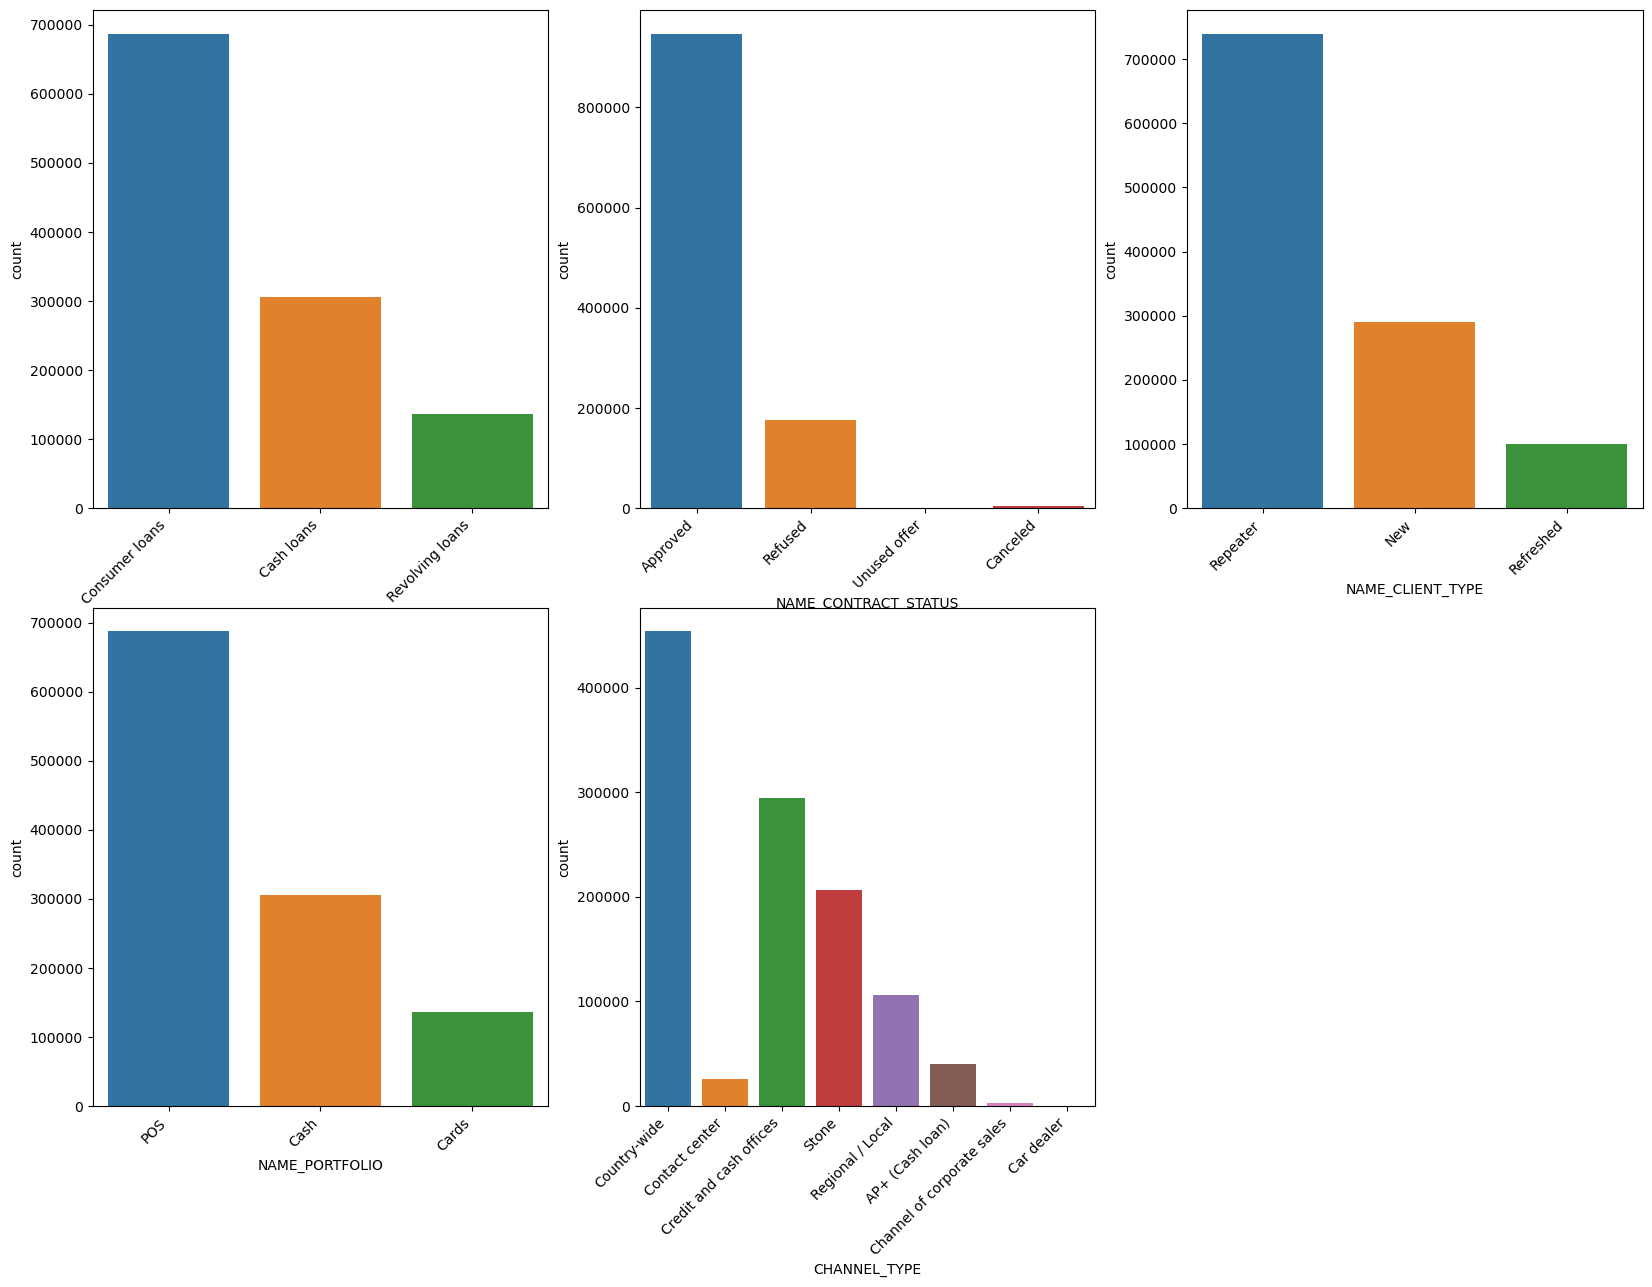

In [112]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = application_previous )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Converting DAYS_DECISION column into MONTH_DECISION column for readablity and analysis

In [113]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
application_previous['MONTH_DECISION'] = abs(application_previous['DAYS_DECISION']//30)
# Drop 'DAYS_DECISION' column
application_previous = application_previous.drop(['DAYS_DECISION'],axis=1)
application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Approved,Repeater,POS,Country-wide,35,12.0,POS mobile with interest,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Approved,Repeater,Cash,Contact center,-1,36.0,Cash X-Sell: low,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: high,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Approved,Repeater,Cash,Credit and cash offices,-1,12.0,Cash X-Sell: middle,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Refused,Repeater,Cash,Credit and cash offices,-1,24.0,Cash Street: high,27


In [114]:
application_previous.shape

(1129387, 15)

## Merging Current application and Previous application dataset


In [117]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age_Group','Income_Group','Ext_source_group']

In [118]:
# Creating a dataset from current application for merging 
current_to_merge = application_data[cols_current]
current_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age_Group,Income_Group,Ext_source_group
0,100002,1,M,Secondary / secondary special,Single / not married,Young,High,Low
1,100003,0,F,Higher education,Married,Mid Age,High,Medium
2,100004,0,M,Secondary / secondary special,Single / not married,Mid Age,Low,Medium
3,100006,0,F,Secondary / secondary special,Civil marriage,Mid Age,Medium,High
4,100007,0,M,Secondary / secondary special,Single / not married,Mid Age,Medium,Low


In [119]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [120]:
# Creating  a dataset from previous application for merging
prev_to_merge = application_previous.drop(cols_prev_to_drop,axis=1)
prev_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Repeater,Cash,Credit and cash offices,12.0,18
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27


In [121]:
# Merging both the datasets
merged_data = pd.merge(prev_to_merge,current_to_merge, on='SK_ID_CURR', how='left')
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age_Group,Income_Group,Ext_source_group
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0.0,F,Incomplete higher,Married,Mid Age,High,High
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0.0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,High
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,Cash,Credit and cash offices,12.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Repeater,Cash,Credit and cash offices,12.0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0.0,F,Secondary / secondary special,Married,Young,High,Medium


In [122]:
merged_data.shape

(1129387, 19)

In [123]:
len(merged_data[np.isnan(merged_data['TARGET'])])

202937

In [124]:
merged_data = merged_data[(~(np.isnan(merged_data['TARGET'])))]      

In [126]:
# Converting TARGET column from float64 to Int64
merged_data['TARGET'] = merged_data['TARGET'].astype('int64')

In [127]:
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age_Group,Income_Group,Ext_source_group
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,High
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0,F,Secondary / secondary special,Married,Young,High,Medium
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,Approved,Repeater,Cash,Credit and cash offices,18.0,23,0,M,Secondary / secondary special,Civil marriage,Mid Age,High,Low
6,2257824,161140,Cash loans,13832.775,211500.0,246397.5,Approved,Repeater,Cash,Credit and cash offices,30.0,28,0,F,Secondary / secondary special,Separated,Senior,High,Low


In [129]:
merged_data['PERCENT_CREDIT'] = round(((merged_data['AMT_CREDIT']/merged_data['AMT_APPLICATION'])*100),2)
merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,Age_Group,Income_Group,Ext_source_group,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,POS,Country-wide,12.0,3,0,F,Incomplete higher,Married,Mid Age,High,High,100.00
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,Cash,Contact center,36.0,6,0,F,Secondary / secondary special,Civil marriage,Mid Age,Low,High,111.88
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,Cash,Credit and cash offices,24.0,27,0,F,Secondary / secondary special,Married,Young,High,Medium,119.72
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,Approved,Repeater,Cash,Credit and cash offices,18.0,23,0,M,Secondary / secondary special,Civil marriage,Mid Age,High,Low,108.12
6,2257824,161140,Cash loans,13832.775,211500.0,246397.5,Approved,Repeater,Cash,Credit and cash offices,30.0,28,0,F,Secondary / secondary special,Separated,Senior,High,Low,116.50


In [130]:
merged_data.to_csv('merged_data.csv', index=False)

## Bivariate analysis

##### Corelation of relevant numerical columns

In [131]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [132]:
# Creating dataframe for numerical columns
merged_corr = merged_data[corr_cols]
merged_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
0,17145.0,17145.0,1730.430,100.00,12.0,3
1,607500.0,679671.0,25188.615,111.88,36.0,6
4,337500.0,404055.0,31924.395,119.72,24.0,27
5,315000.0,340573.5,23703.930,108.12,18.0,23
6,211500.0,246397.5,13832.775,116.50,30.0,28


In [133]:
# Corelation matrix
merged_corr.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
AMT_APPLICATION,1.000000,0.858346,0.764883,0.223758,0.535901,-0.299682
AMT_CREDIT,0.858346,1.000000,0.796308,0.348789,0.438004,-0.293127
AMT_ANNUITY,0.764883,0.796308,1.000000,0.220890,0.221641,-0.243874
PERCENT_CREDIT,0.223758,0.348789,0.220890,1.000000,0.400114,-0.256234
CNT_PAYMENT,0.535901,0.438004,0.221641,0.400114,1.000000,-0.118905
MONTH_DECISION,-0.299682,-0.293127,-0.243874,-0.256234,-0.118905,1.000000


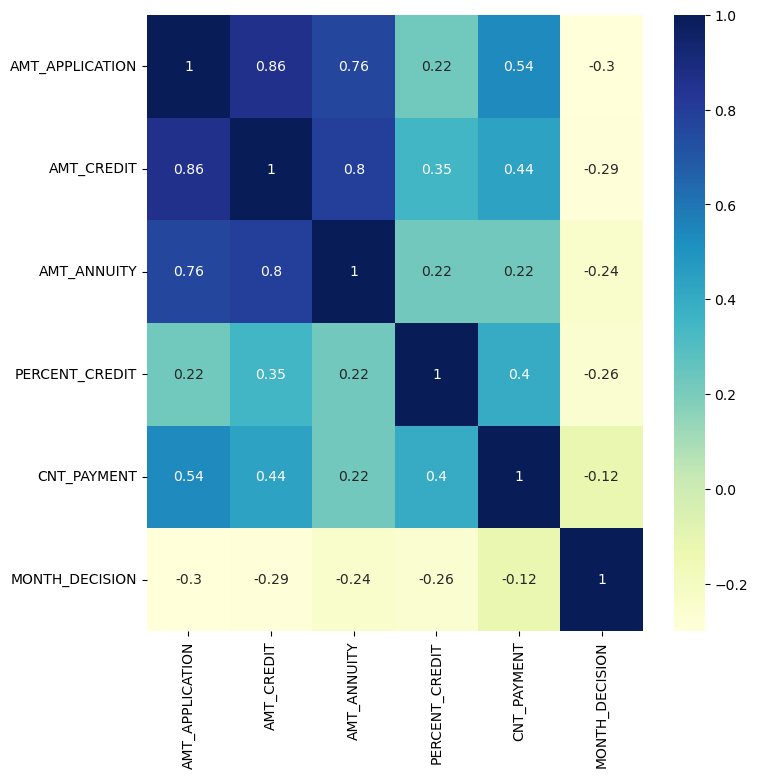

In [135]:
plt.figure(figsize=(8,8))
sns.heatmap(merged_corr.corr(),cmap="YlGnBu",annot=True)
plt.show()

### Bivariate analysis on continious variable

###### Application amount and credited amount

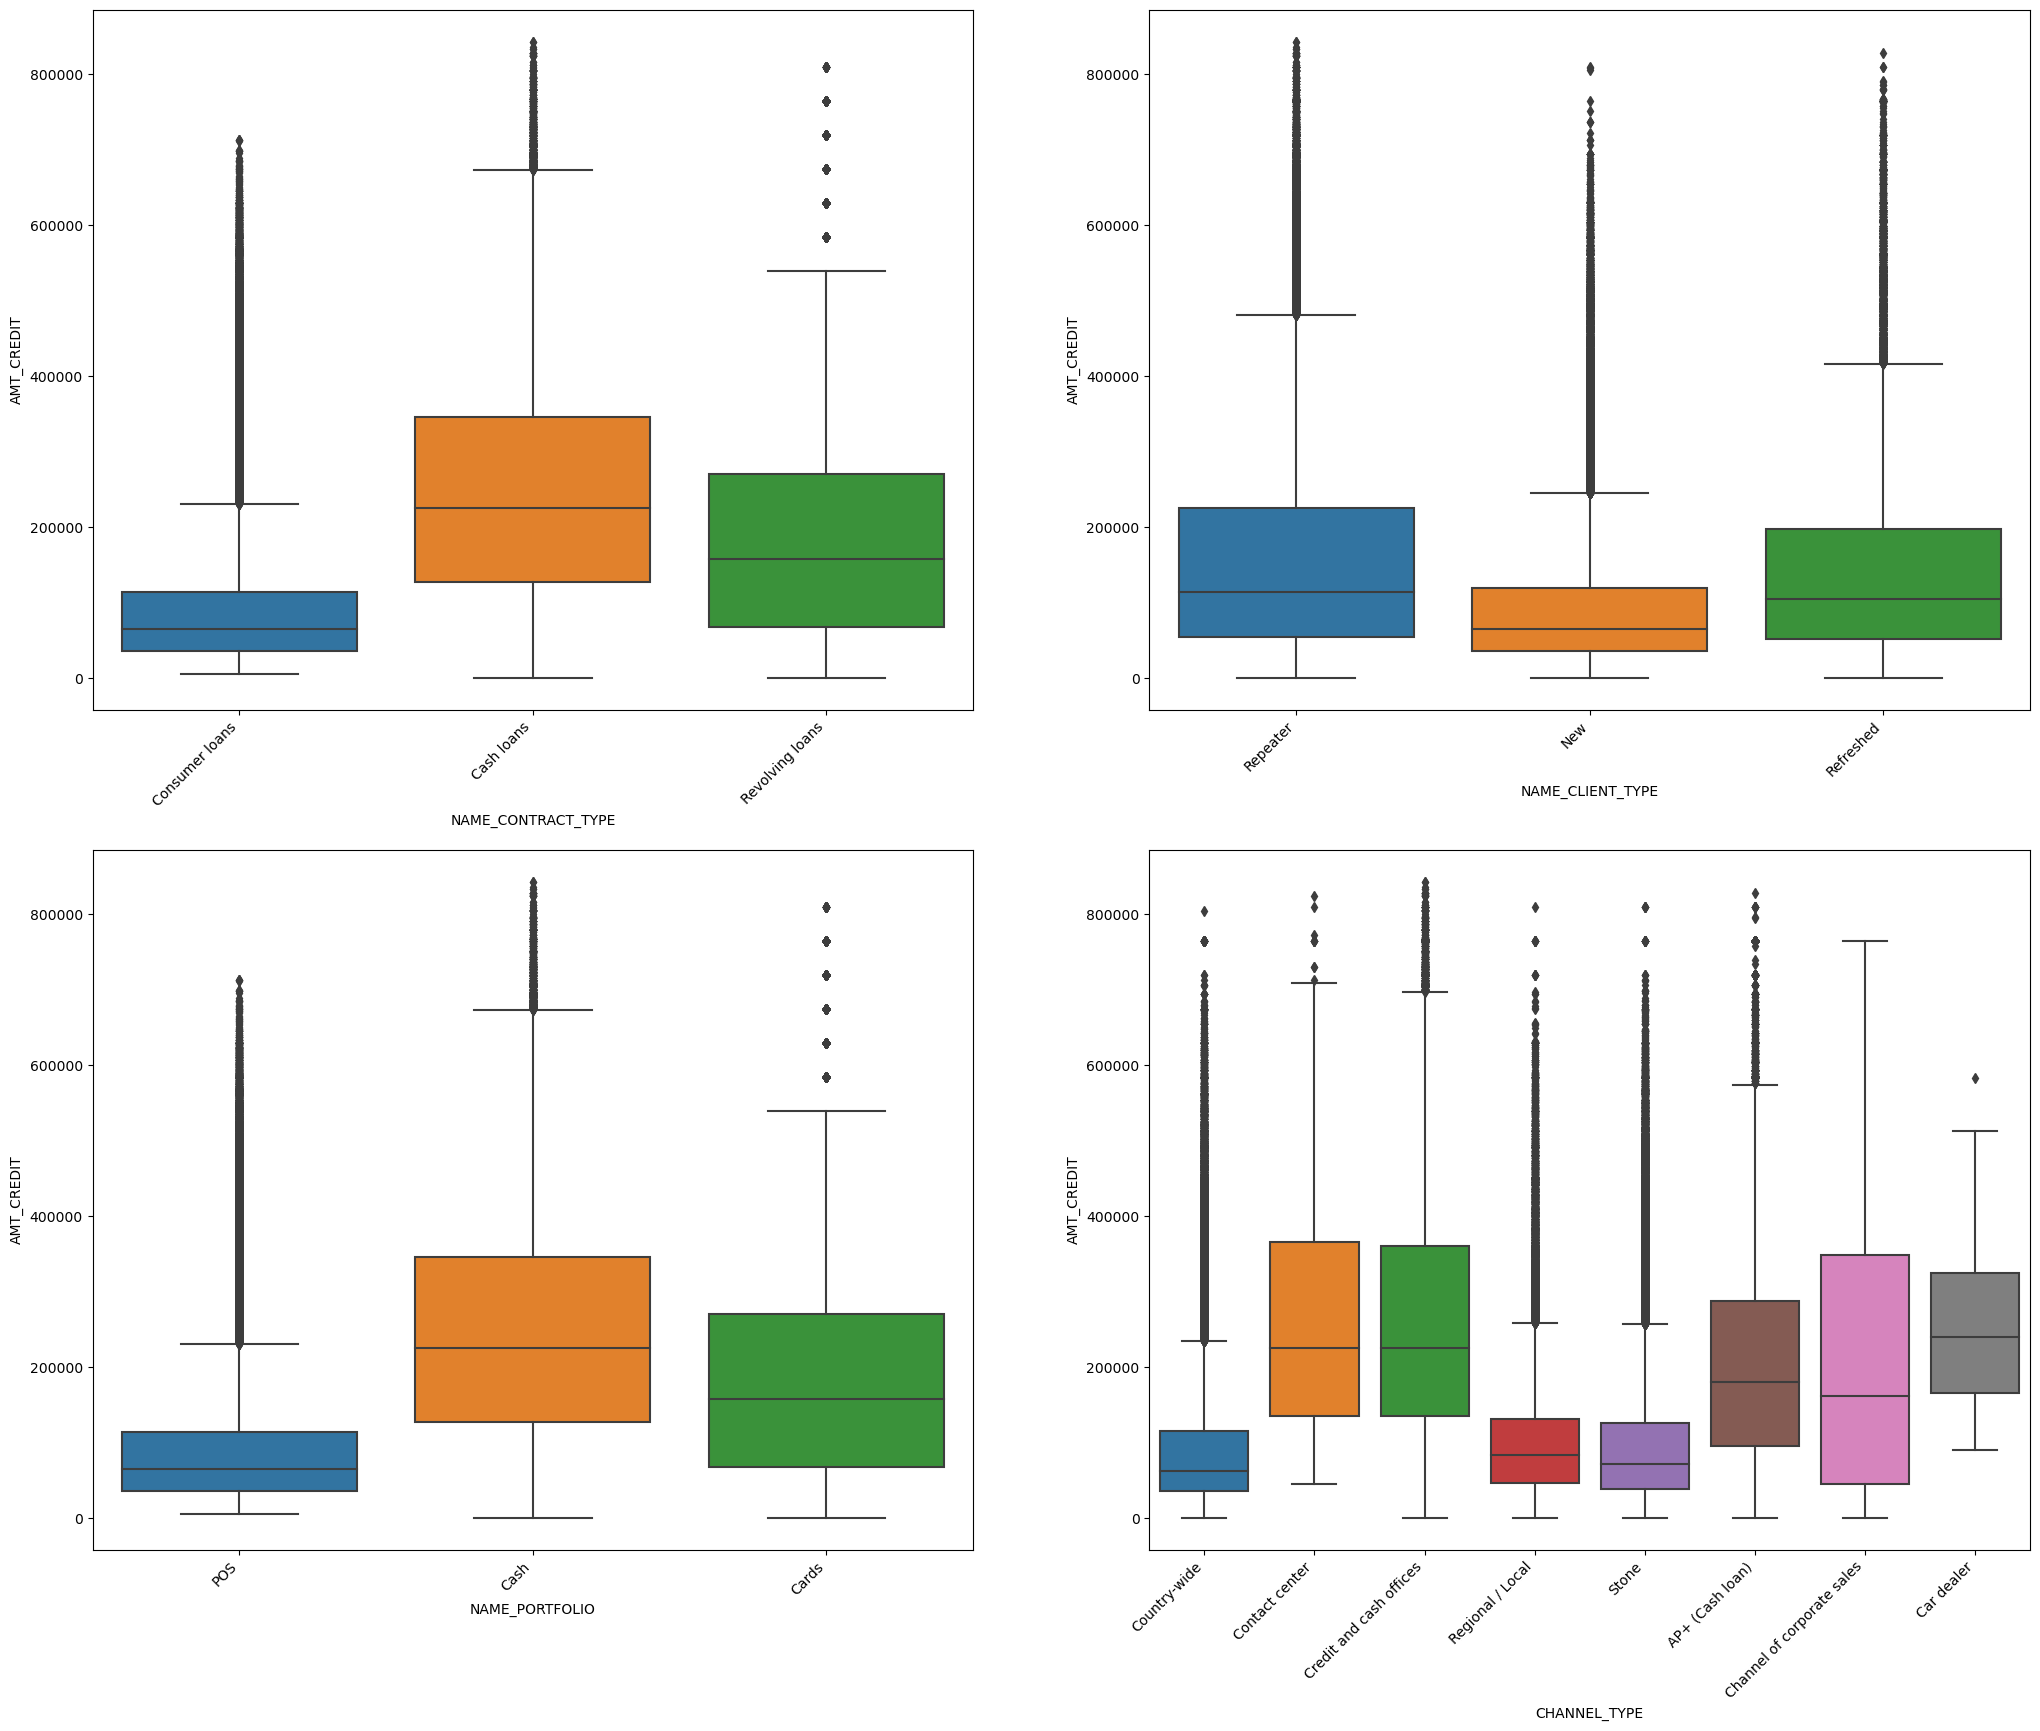

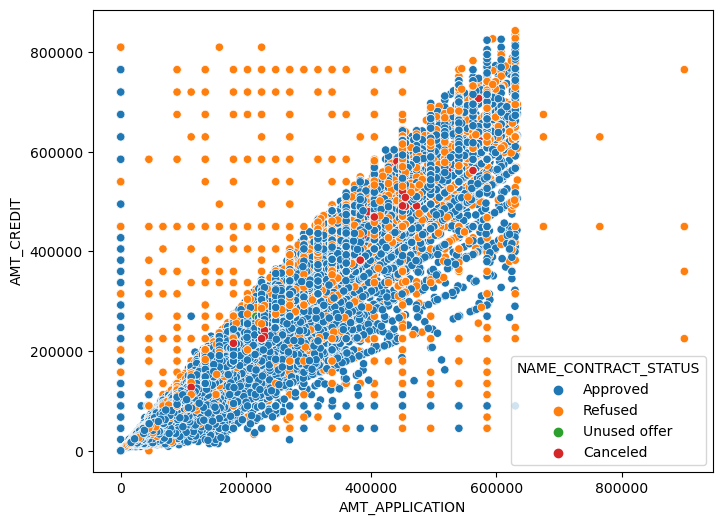

In [140]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=merged_data)
plt.show()

In [138]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

In [139]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged_data)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')